In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_parquet('drive/MyDrive/Colab Notebooks/train.parquet')

В датасете три целевых переменных. total_target = max(target_1, target_2)

In [ ]:
df

,id,rko_start_months,max_end_fact_fin_deals,max_end_plan_non_fin_deals,max_start_fin_deals,max_start_non_fin_deals,min_end_fact_fin_deals,min_end_plan_non_fin_deals,min_start_fin_deals,min_start_non_fin_deals,...,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m,target_1,target_2,total_target
0,0,48.871217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.064993,3.319602e+04,1.229488,0.396969,3.235240e+05,12.420855,9.069157,1,1,1
1,1,19.530576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.270542,3.319549e+04,1.229488,-0.137339,1.456416e+05,2.124925,2.069157,0,0,0
2,2,9.706201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.431839,2.650712e+05,4.229488,3.595162,1.257271e+05,0.999583,1.069157,0,0,0
3,3,92.569902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.990581,4.950943e+05,9.229488,8.582252,3.703923e+05,3.066714,3.069157,0,0,0
4,4,26.538856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.393927,3.319632e+04,1.229488,0.276606,1.257268e+05,1.219935,1.069157,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359995,359995,-999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.177506,2.038701e+06,51.229488,22.182922,2.006430e+05,3.963913,2.069157,0,0,0
359996,359996,-999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.301299,3.319599e+04,1.229488,0.225770,1.257279e+05,1.114018,1.069157,0,0,0
359997,359997,-999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.150675,2.151680e+05,16.229488,8.413681,1.309472e+07,5.397099,5.069157,0,0,0
359998,359998,-999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.062204,1.874074e+07,353.229488,58.237079,1.078043e+07,294.991216,67.069157,0,0,0


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df.isna().sum()

id                                 0
rko_start_months                  59
max_end_fact_fin_deals        313574
max_end_plan_non_fin_deals    345094
max_start_fin_deals           315677
max_start_non_fin_deals       343958
min_end_fact_fin_deals        315677
min_end_plan_non_fin_deals    343924
min_start_fin_deals           314637
min_start_non_fin_deals       343951
balance_amt_avg                 1045
balance_amt_max                 1047
balance_amt_min                 1046
balance_amt_day_avg             1040
channel_code                    7907
city                           99435
city_type                      99435
index_city_code               205279
ogrn_days_end_month              432
ogrn_days_end_quarter            433
ogrn_month                       433
ogrn_year                        433
branch_code                        0
ft_registration_date             799
max_founderpres               210723
min_founderpres               209313
ogrn_exist_months                433
o

Correlation matrix

In [ ]:
corr_matrix = df.corr()

<ipython-input-5-b69b4b6a6184>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [ ]:
corr_target = corr_matrix['target_1']
corr_target = corr_target[abs(corr_target) > 0.7]
corr_target

target_1        1.000000
total_target    0.873459
Name: target_1, dtype: float64

In [ ]:
corr_target = corr_matrix['target_2']
corr_target = corr_target[abs(corr_target) > 0.7]
corr_target

target_2    1.0
Name: target_2, dtype: float64

In [ ]:
corr_target = corr_matrix['total_target']
corr_target = corr_target[abs(corr_target) > 0.7]
corr_target

target_1        0.873459
total_target    1.000000
Name: total_target, dtype: float64

In [ ]:
category_columns = ['channel_code', 'city', 'city_type', 'index_city_code', 'ogrn_month', 'ogrn_year', 'branch_code', 'okved', 'segment']

Prediction of first target

In [ ]:
X = df.iloc[:, :100]
y = df.iloc[:, 100]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = CatBoostClassifier()

model.fit(X_train, y_train)
y_pred_1 = model.predict(X_test)


In [ ]:
y_score_1 = model.predict_proba(X_test) [:,1]

roc_auc = roc_auc_score(y_test, y_score_1)
roc_auc

0.9428070285331563

Prediction of second target

In [ ]:
X = df.iloc[:, :100]
y = df.iloc[:, 101]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = CatBoostClassifier()

model.fit(X_train, y_train)
y_pred_2 = model.predict(X_test)

In [ ]:
y_score_2 = model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_score_2)
roc_auc

0.8062418803172429

Total prediction

In [ ]:
y_score = [max(x, y) for x, y in zip(y_score_1, y_score_2)]

y = df.iloc[:, 102]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
roc_auc = roc_auc_score(y_test, y_score)
roc_auc

0.9036888351303299

In [ ]:
y_pred = [max(x, y) for x, y in zip(y_pred_1, y_pred_2)]

accuracy = accuracy_score(y_pred, y_test)
accuracy

0.9403194444444445

Prediction on total target

In [ ]:
model = CatBoostClassifier()

model.fit(X_train, y_train)
y_pred_total = model.predict(X_test)

In [ ]:
y_score_3 = model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_score_3)
roc_auc

0.9005501897308739

Change parameters

In [ ]:
X = df.iloc[:, :100]
y = df.iloc[:, 102]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

iterations = [10, 100, 1000]
depths = [2, 5, 10]


for iteration in iterations:
  for depth in depths:
    model = CatBoostClassifier(iterations=iteration, depth=depth, verbose=False)
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:,1]
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_score)
    accuracy = accuracy_score(y_pred, y_test)
    print(f"Parameters. Iterations: {iteration}. Depth: {depth}.")
    print(f"Roc-auc: {roc_auc}. Accuracy: {accuracy}.")
    print("==========================================")

Parameters. Iterations: 10. Depth: 2.
Roc-auc: 0.8645996984571508. Accuracy: 0.9305972222222222.
Parameters. Iterations: 10. Depth: 5.
Roc-auc: 0.8714291781593042. Accuracy: 0.9341805555555556.
Parameters. Iterations: 10. Depth: 10.
Roc-auc: 0.8822842380144349. Accuracy: 0.9356388888888889.
Parameters. Iterations: 100. Depth: 2.
Roc-auc: 0.8819623288327814. Accuracy: 0.9353055555555555.
Parameters. Iterations: 100. Depth: 5.
Roc-auc: 0.8885645425388091. Accuracy: 0.9365.
Parameters. Iterations: 100. Depth: 10.
Roc-auc: 0.88793100339147. Accuracy: 0.9415555555555556.
Parameters. Iterations: 1000. Depth: 2.
Roc-auc: 0.8874318961618656. Accuracy: 0.9363472222222222.
Parameters. Iterations: 1000. Depth: 5.
Roc-auc: 0.8967594433089338. Accuracy: 0.9387638888888888.
Parameters. Iterations: 1000. Depth: 10.
Roc-auc: 0.9111139164945963. Accuracy: 0.9480277777777778.


Fill NaN with values

In [ ]:
df_filled = df.copy()

for category in category_columns:
  df_filled[category].fillna(df_filled[category].mode()[0], inplace=True)

In [ ]:
number_columns = df_filled.columns.drop(category_columns)
number_columns = number_columns.drop(['target_1', 'target_2', 'total_target'])

In [ ]:
for number in number_columns:
  df_filled[number].fillna(df_filled[number].mean(), inplace= True)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_filled.isna().sum()

id                            0
rko_start_months              0
max_end_fact_fin_deals        0
max_end_plan_non_fin_deals    0
max_start_fin_deals           0
max_start_non_fin_deals       0
min_end_fact_fin_deals        0
min_end_plan_non_fin_deals    0
min_start_fin_deals           0
min_start_non_fin_deals       0
balance_amt_avg               0
balance_amt_max               0
balance_amt_min               0
balance_amt_day_avg           0
channel_code                  0
city                          0
city_type                     0
index_city_code               0
ogrn_days_end_month           0
ogrn_days_end_quarter         0
ogrn_month                    0
ogrn_year                     0
branch_code                   0
ft_registration_date          0
max_founderpres               0
min_founderpres               0
ogrn_exist_months             0
okved                         0
segment                       0
sum_of_paym_2m                0
sum_of_paym_6m                0
sum_of_p

Correlation matrix again

In [ ]:
corr_matrix = df_filled.corr()

<ipython-input-23-82bef63d6001>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_filled.corr()


In [ ]:
corr_target = corr_matrix['target_1']
corr_target = corr_target[abs(corr_target) > 0.7]
corr_target

target_1        1.000000
total_target    0.873459
Name: target_1, dtype: float64

In [ ]:
corr_target = corr_matrix['target_2']
corr_target = corr_target[abs(corr_target) > 0.7]
corr_target

target_2    1.0
Name: target_2, dtype: float64

In [ ]:
corr_target = corr_matrix['total_target']
corr_target = corr_target[abs(corr_target) > 0.7]
corr_target

target_1        0.873459
total_target    1.000000
Name: total_target, dtype: float64

Mutual information

In [ ]:
X = df_filled.iloc[:, :100]
y = df_filled.iloc[:, 102]

label_encoder = LabelEncoder()

for column in category_columns:
  X[column] = label_encoder.fit_transform(X[column])

mi_scores = mutual_info_classif(X, y)
print("Target_1")
for i, score in enumerate(mi_scores):
  print(f"Признак{i+1}: {score}")

In [ ]:
mi_df = pd.DataFrame({'Feature': X.columns, 'Mi score': mi_scores})
mi_df.sort_values(by='Mi score', ascending=False)

,Feature,Mi score
5,max_start_non_fin_deals,0.081523
3,max_end_plan_non_fin_deals,0.080323
9,min_start_non_fin_deals,0.079437
7,min_end_plan_non_fin_deals,0.071619
4,max_start_fin_deals,0.069249
11,balance_amt_max,0.059231
10,balance_amt_avg,0.057842
13,balance_amt_day_avg,0.056689
78,cnt_days_deb_e_oper_3m,0.055976
81,cnt_days_cred_e_oper_3m,0.054160


Prediction of first target

In [ ]:
X = df_filled.iloc[:, :100]
y = df_filled.iloc[:, 100]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = CatBoostClassifier()

model.fit(X_train, y_train)
y_pred_1 = model.predict(X_test)


In [ ]:
y_score_1 = model.predict_proba(X_test) [:,1]

roc_auc = roc_auc_score(y_test, y_score_1)
roc_auc

0.9425782826001287

Prediction of second target

In [ ]:
X = df_filled.iloc[:, :100]
y = df_filled.iloc[:, 101]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = CatBoostClassifier()

model.fit(X_train, y_train)
y_pred_2 = model.predict(X_test)

In [ ]:
y_score_2 = model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_score_2)
roc_auc

0.7991444243788172

Total prediction

In [ ]:
y_score = [max(x, y) for x, y in zip(y_score_1, y_score_2)]

y = df_filled.iloc[:, 102]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
roc_auc = roc_auc_score(y_test, y_score)
roc_auc

0.9021885055284469

In [ ]:
y_pred = [max(x, y) for x, y in zip(y_pred_1, y_pred_2)]

accuracy = accuracy_score(y_pred, y_test)
accuracy

0.9404305555555555

Prediction on total target

In [ ]:
model = CatBoostClassifier()

model.fit(X_train, y_train)
y_pred_total = model.predict(X_test)

In [ ]:
y_score_3 = model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_score_3)
roc_auc

0.8990546437279399

In [ ]:
accuracy = accuracy_score(y_pred_total, y_test)
accuracy

0.940375

Change parameters

In [ ]:
X = df_filled.iloc[:, :100]
y = df_filled.iloc[:, 102]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

iterations = [10, 100, 1000]
depths = [2, 5, 10]


for iteration in iterations:
  for depth in depths:
    model = CatBoostClassifier(iterations=iteration, depth=depth, verbose=False)
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:,1]
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_score)
    accuracy = accuracy_score(y_pred, y_test)
    print(f"Parameters. Iterations: {iteration}. Depth: {depth}.")
    print(f"Roc-auc: {roc_auc}. Accuracy: {accuracy}.")
    print("==========================================")

Parameters. Iterations: 10. Depth: 2.
Roc-auc: 0.8615184562450846. Accuracy: 0.9315555555555556.
Parameters. Iterations: 10. Depth: 5.
Roc-auc: 0.8710844248224018. Accuracy: 0.9339166666666666.
Parameters. Iterations: 10. Depth: 10.
Roc-auc: 0.8798135948899841. Accuracy: 0.9360416666666667.
Parameters. Iterations: 100. Depth: 2.
Roc-auc: 0.8796983903663247. Accuracy: 0.9357083333333334.
Parameters. Iterations: 100. Depth: 5.
Roc-auc: 0.8865930720333772. Accuracy: 0.9369166666666666.
Parameters. Iterations: 100. Depth: 10.
Roc-auc: 0.885232405502393. Accuracy: 0.939875.
Parameters. Iterations: 1000. Depth: 2.
Roc-auc: 0.8867472079613642. Accuracy: 0.9365555555555556.
Parameters. Iterations: 1000. Depth: 5.
Roc-auc: 0.8965925840539728. Accuracy: 0.9395833333333333.
Parameters. Iterations: 1000. Depth: 10.
Roc-auc: 0.9113166440230874. Accuracy: 0.9472777777777778.


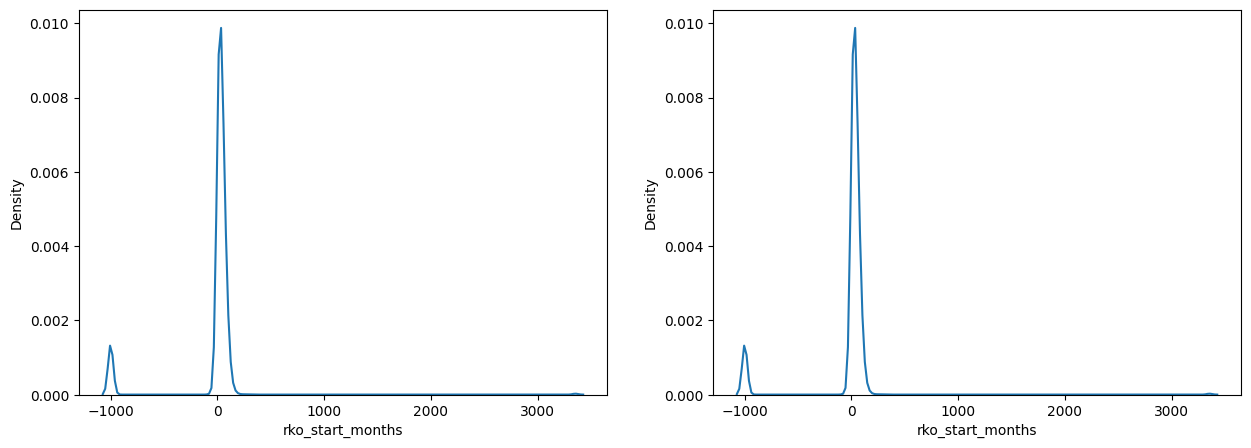

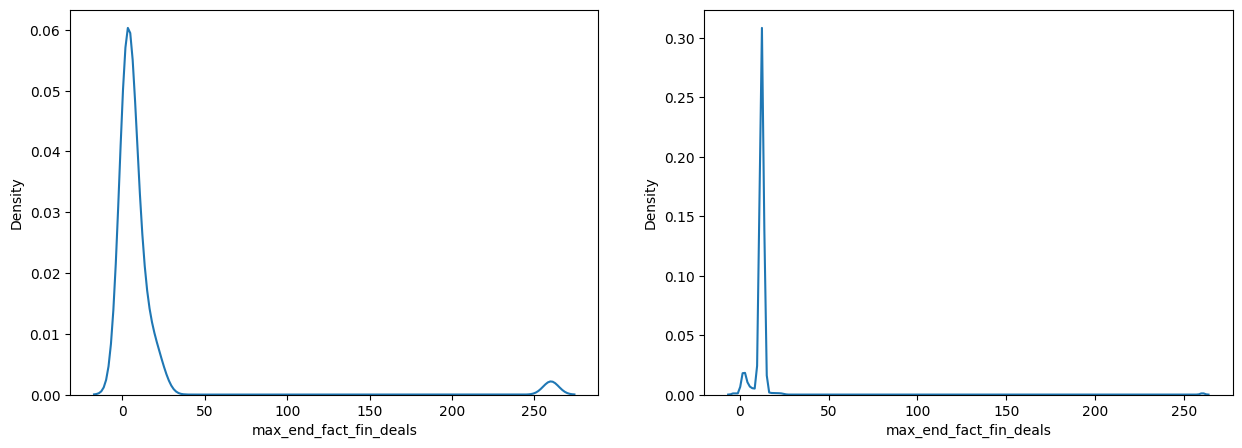

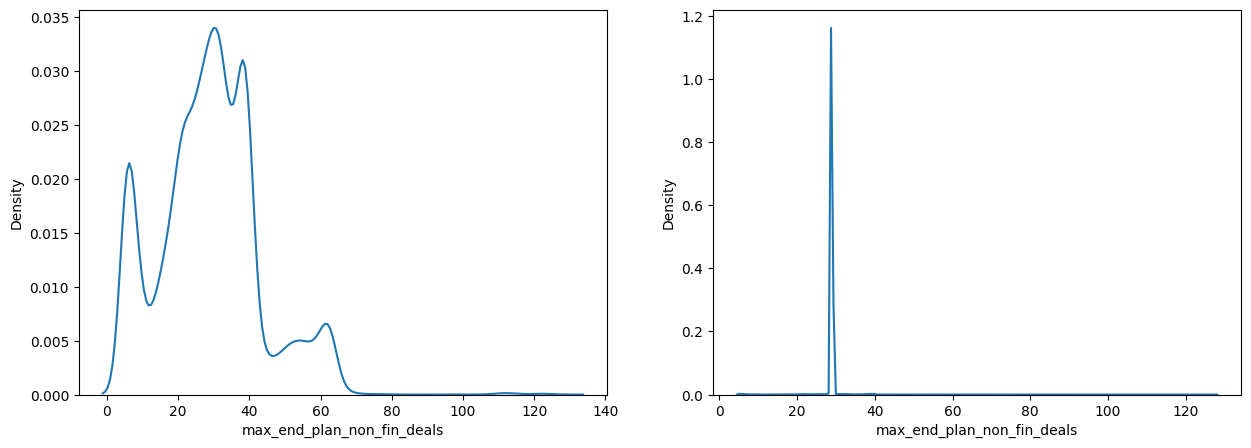

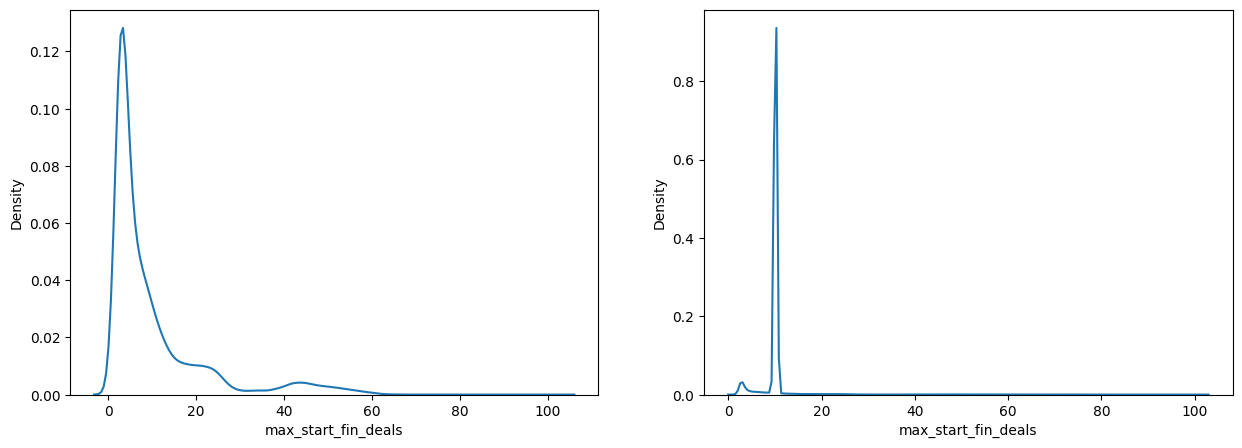

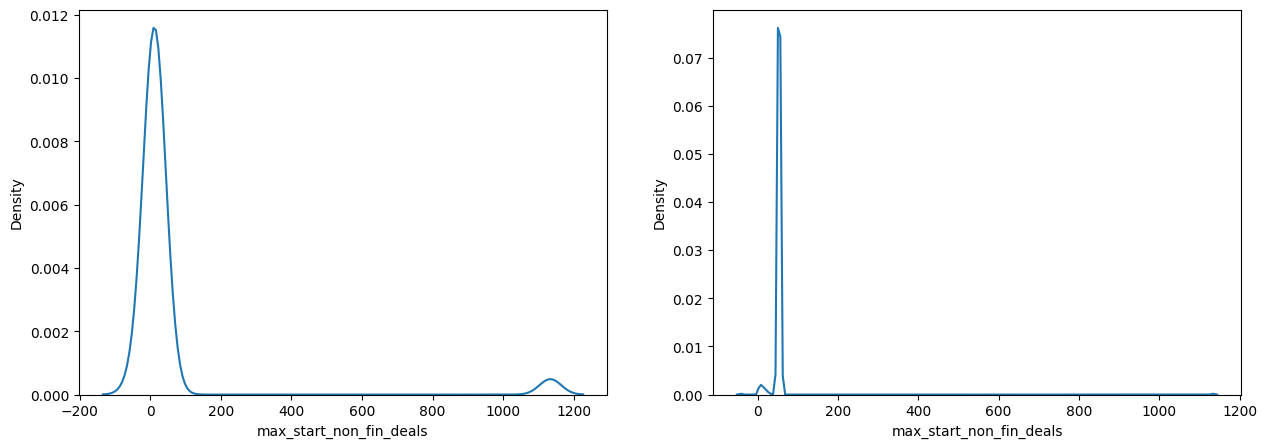

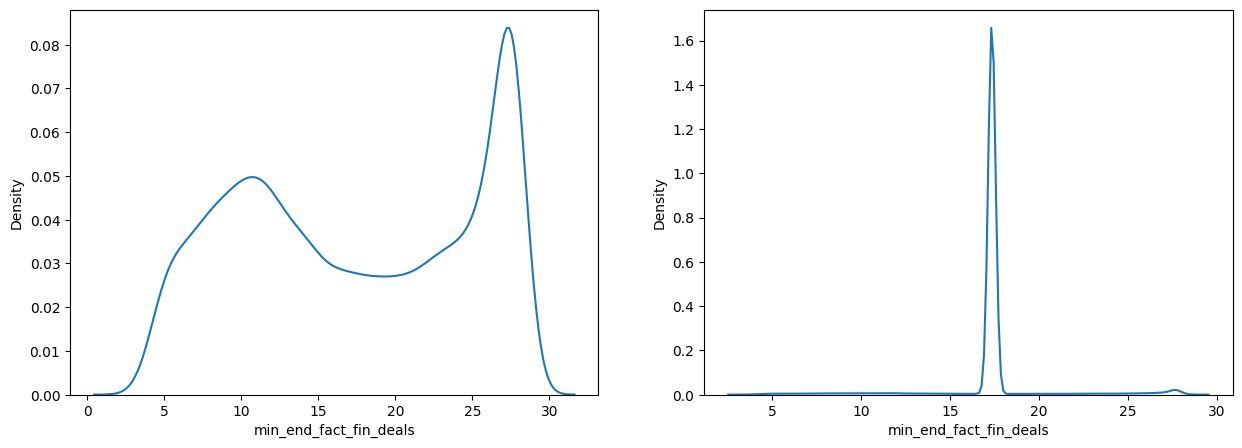

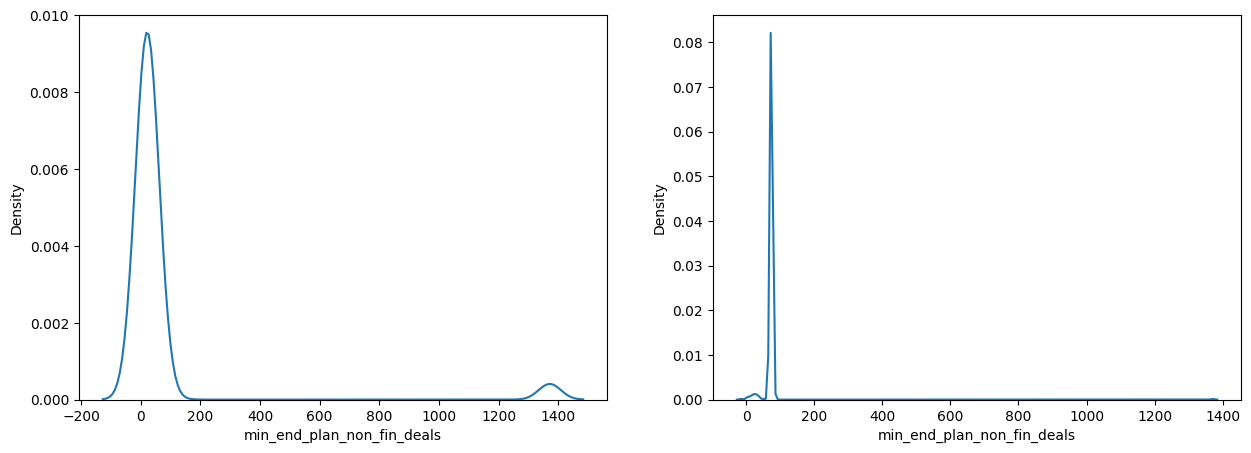

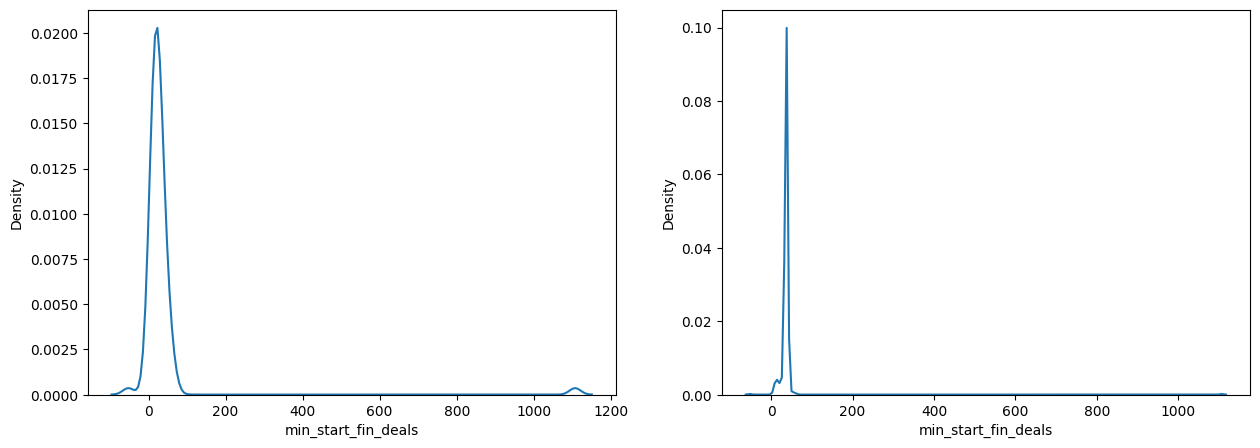

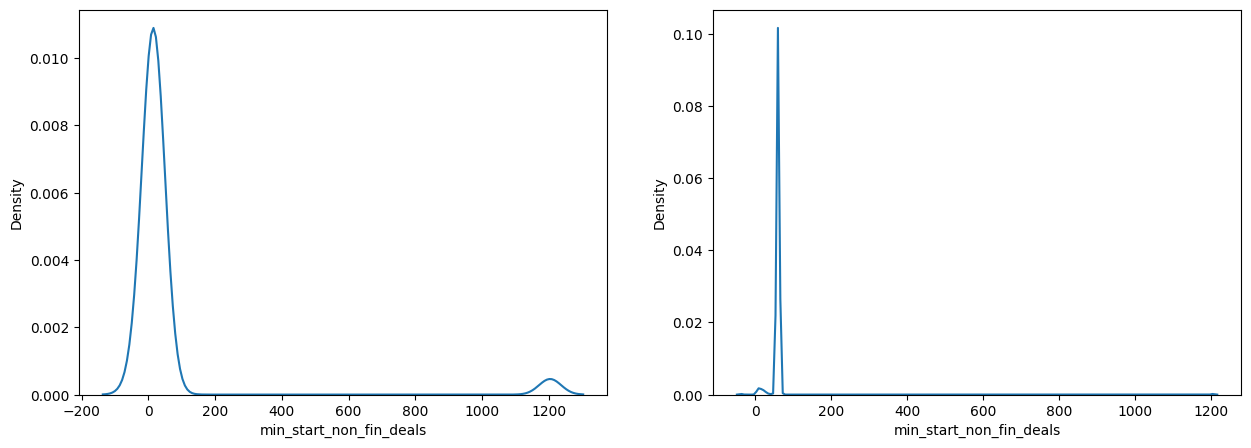

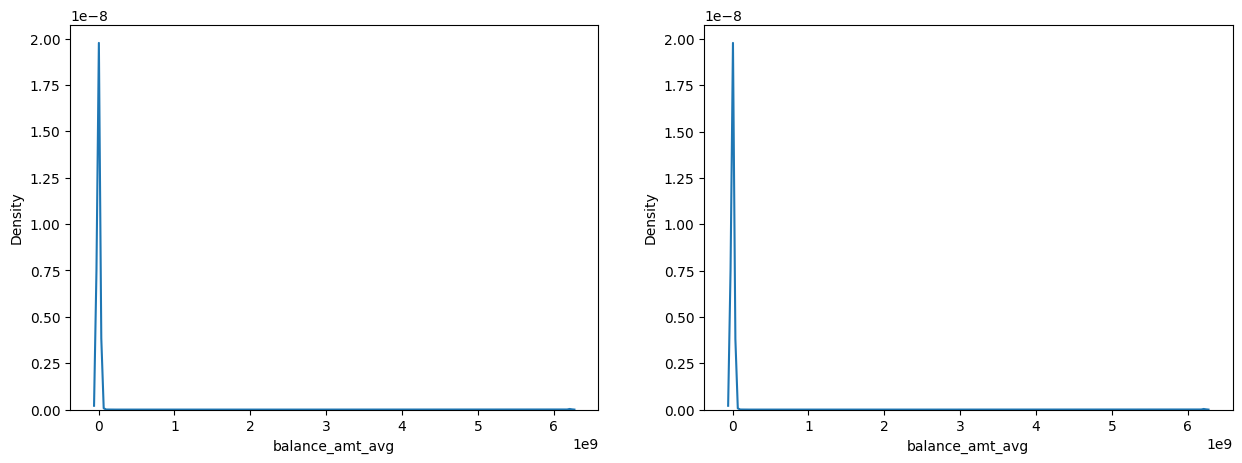

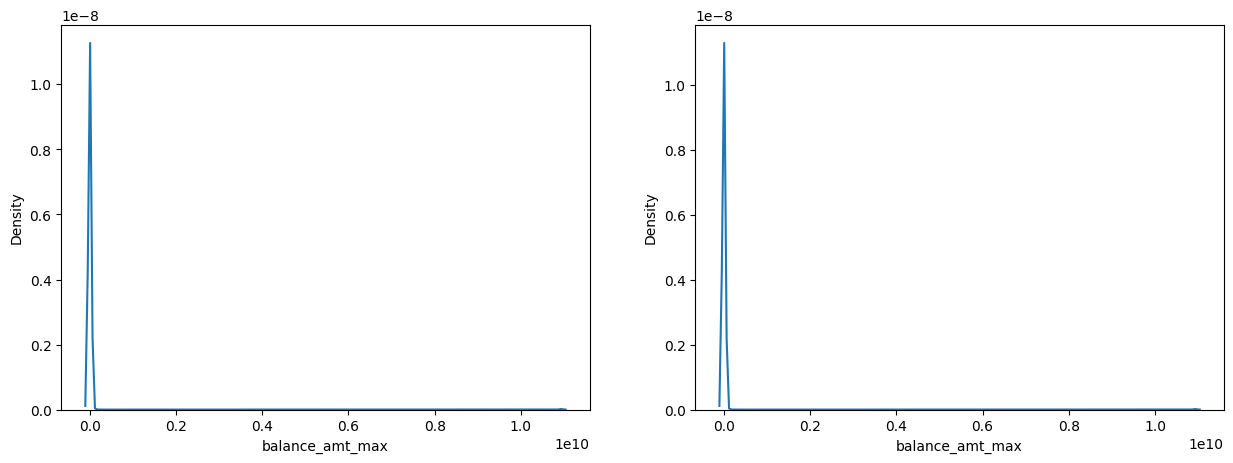

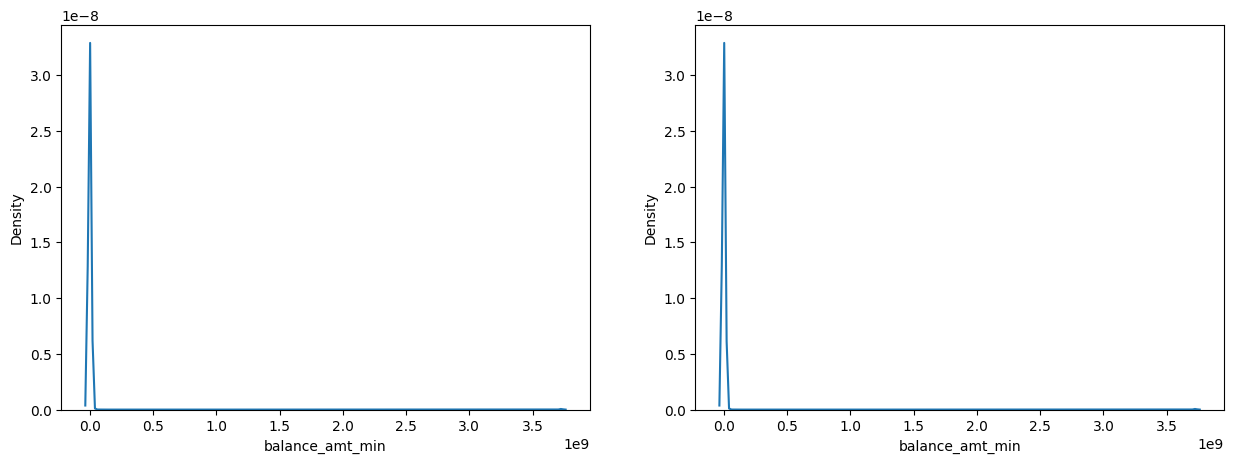

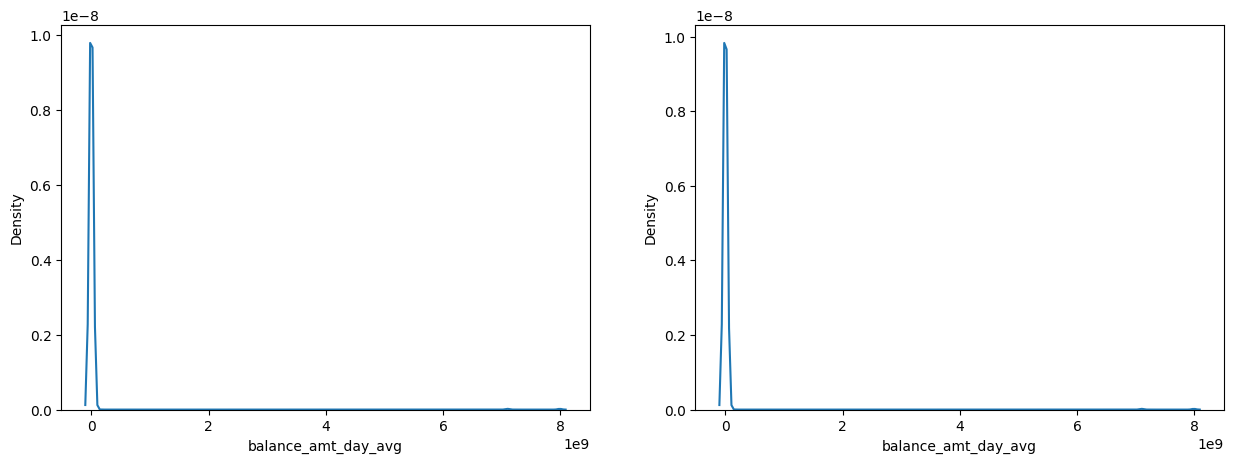

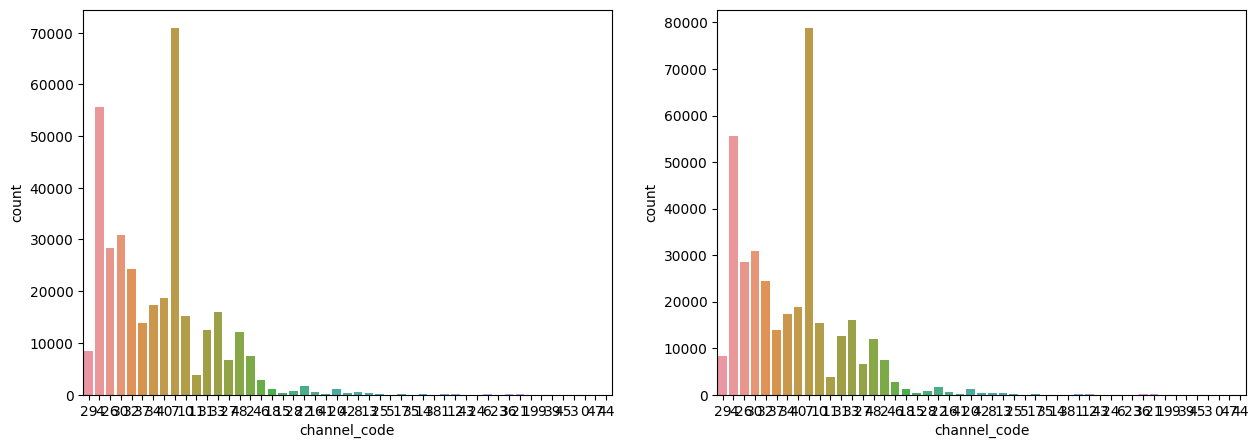

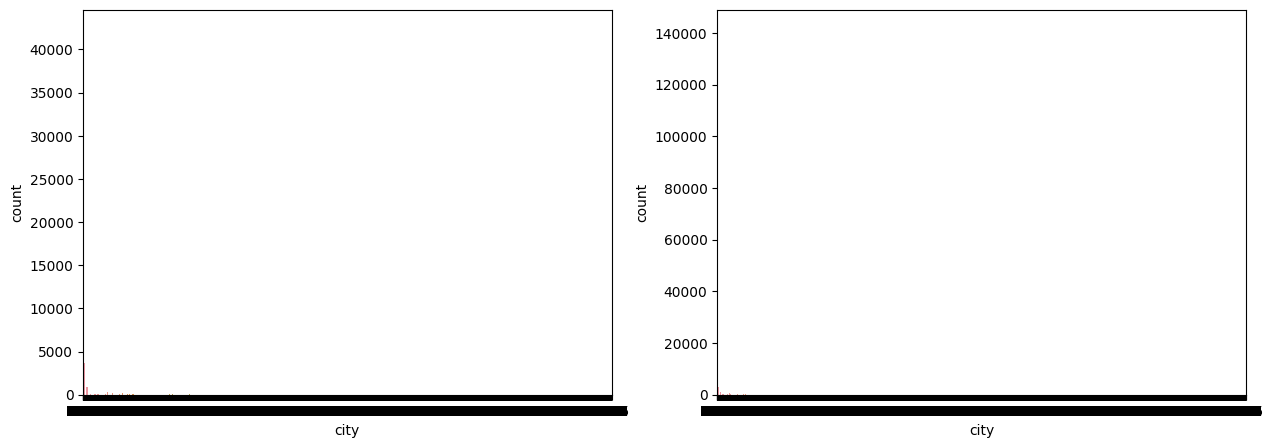

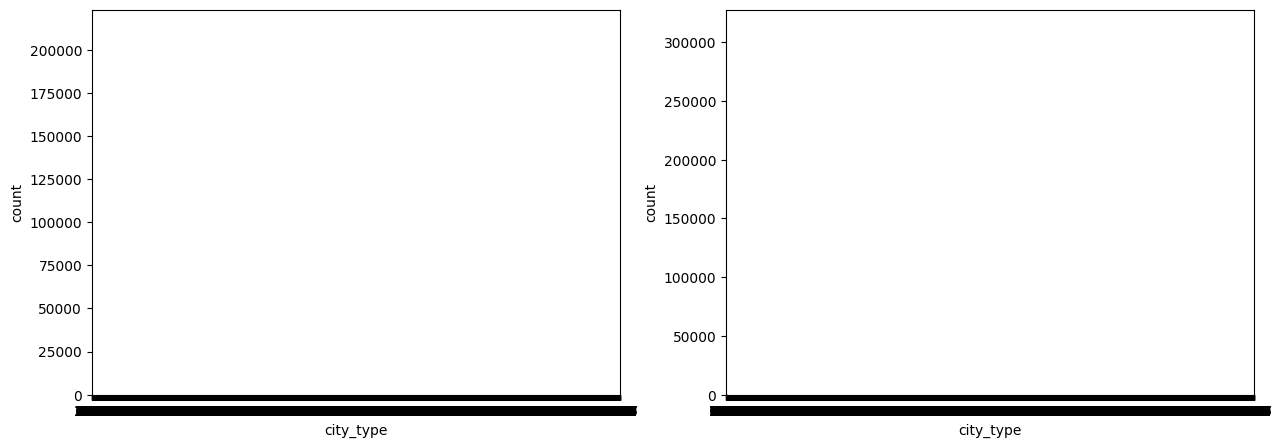

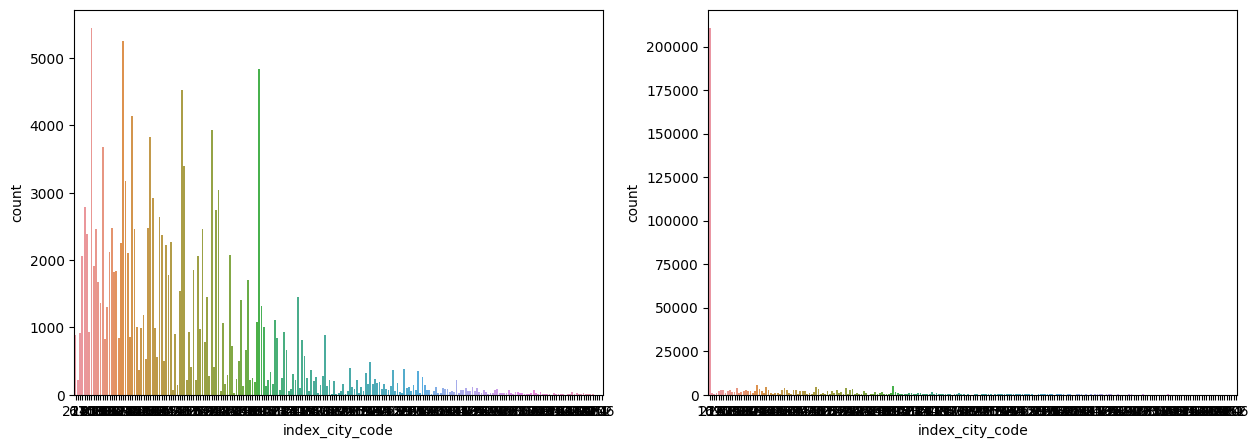

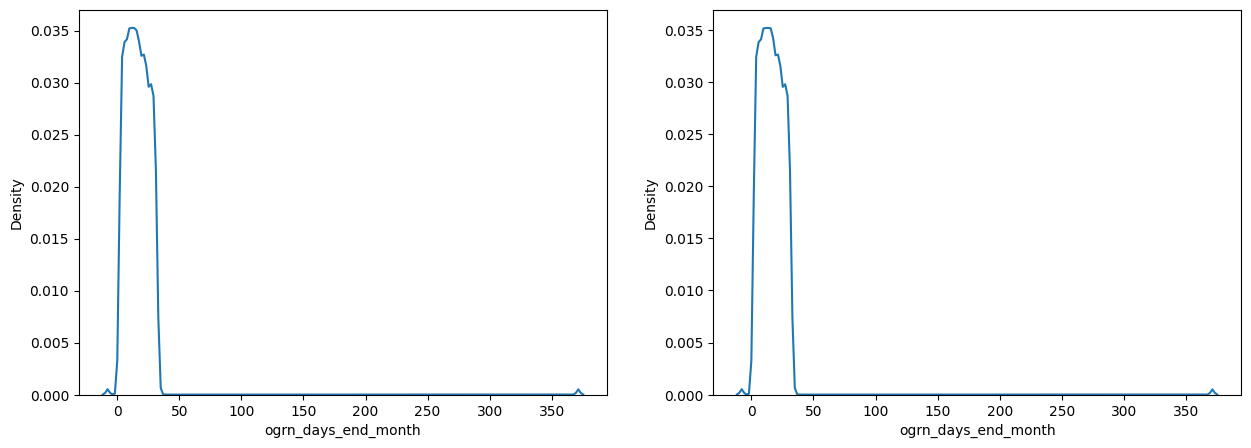

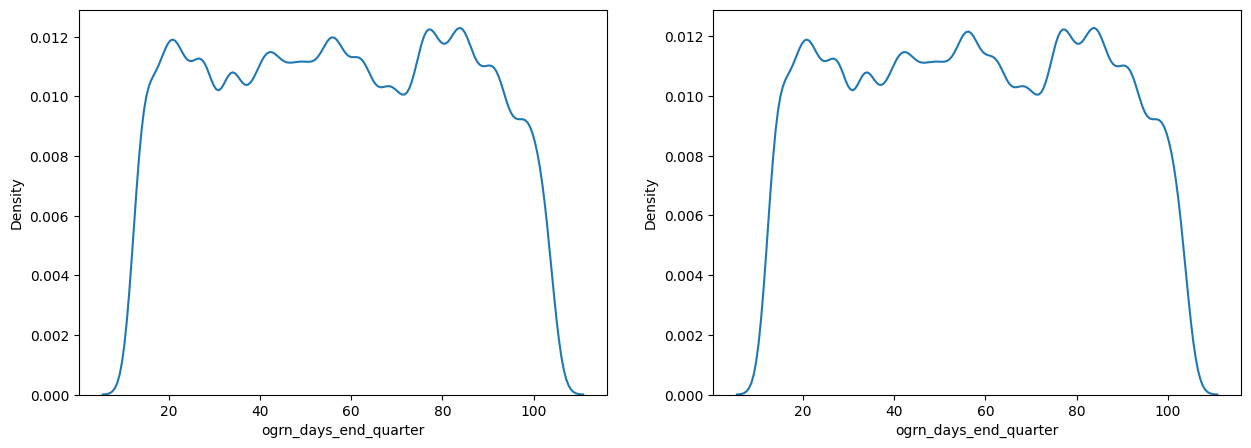

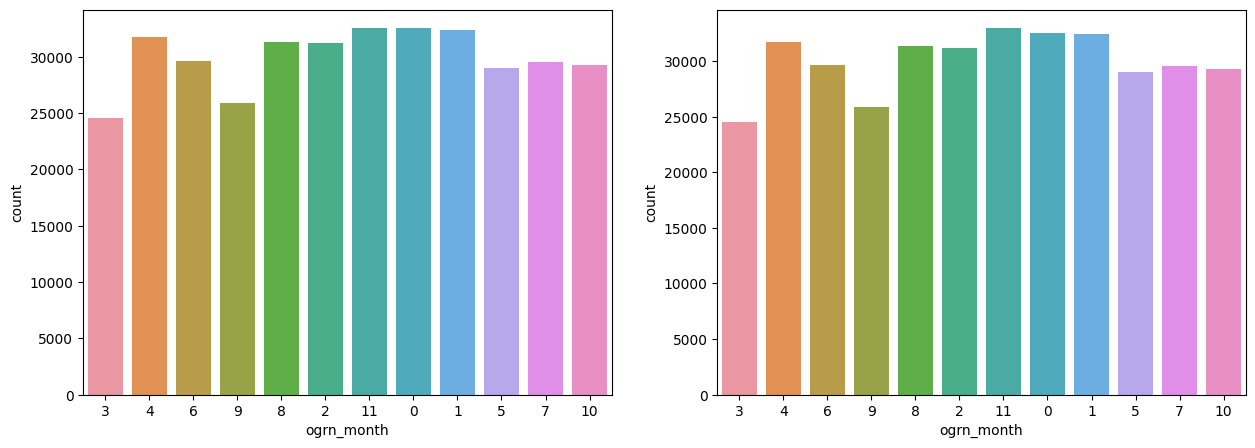

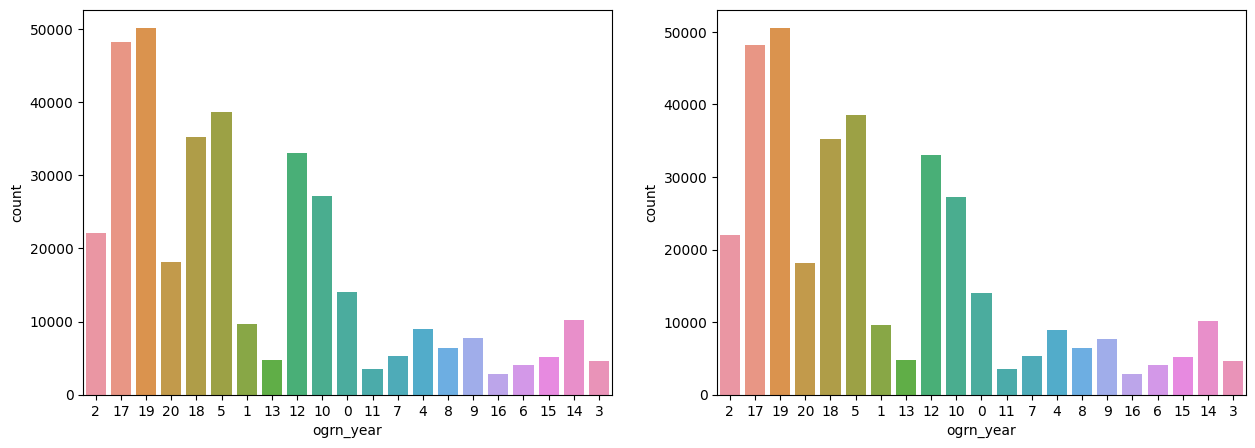

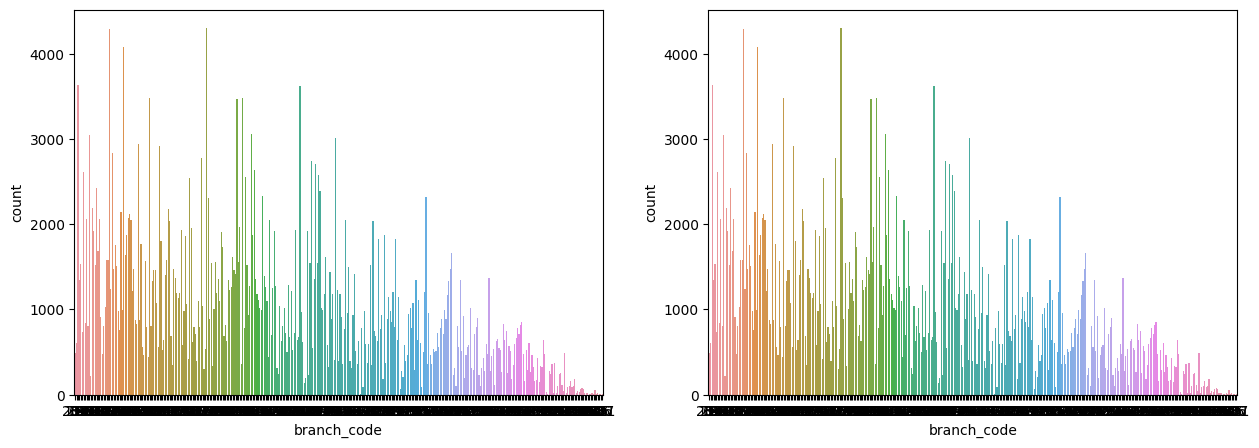

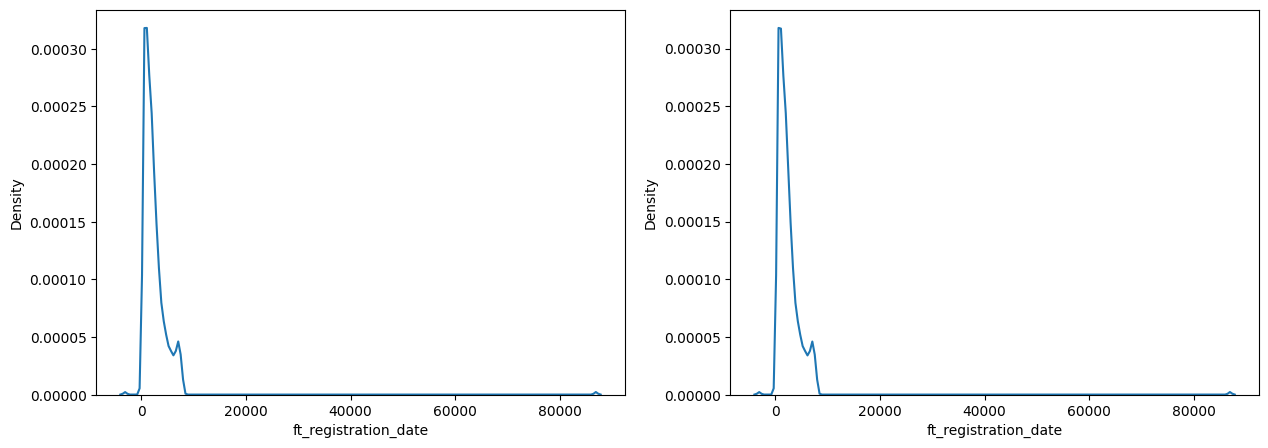

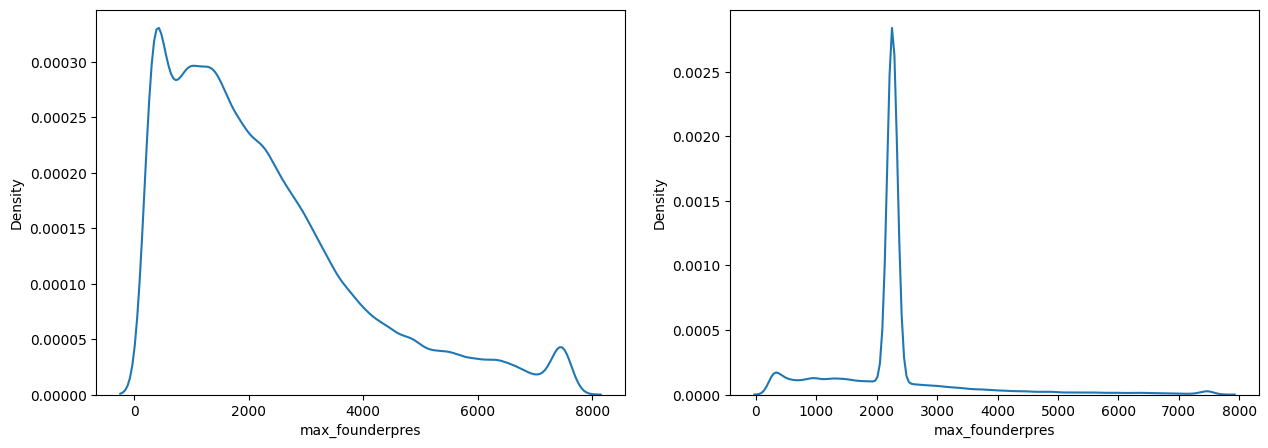

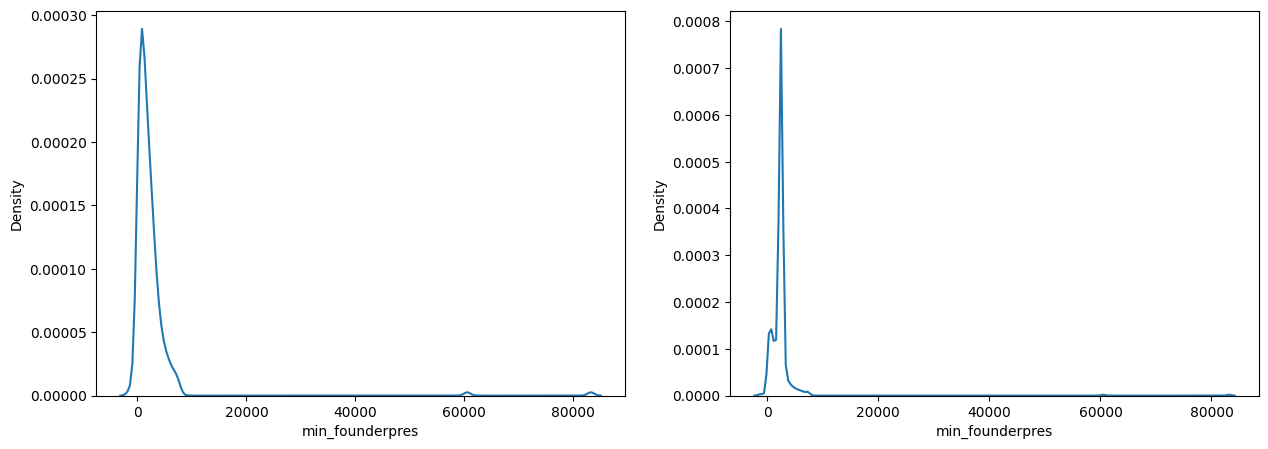

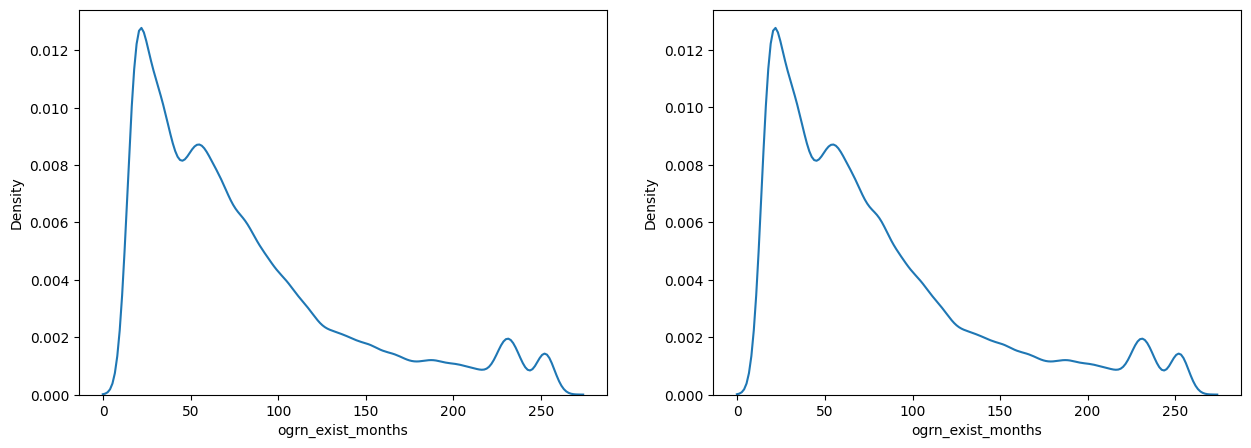

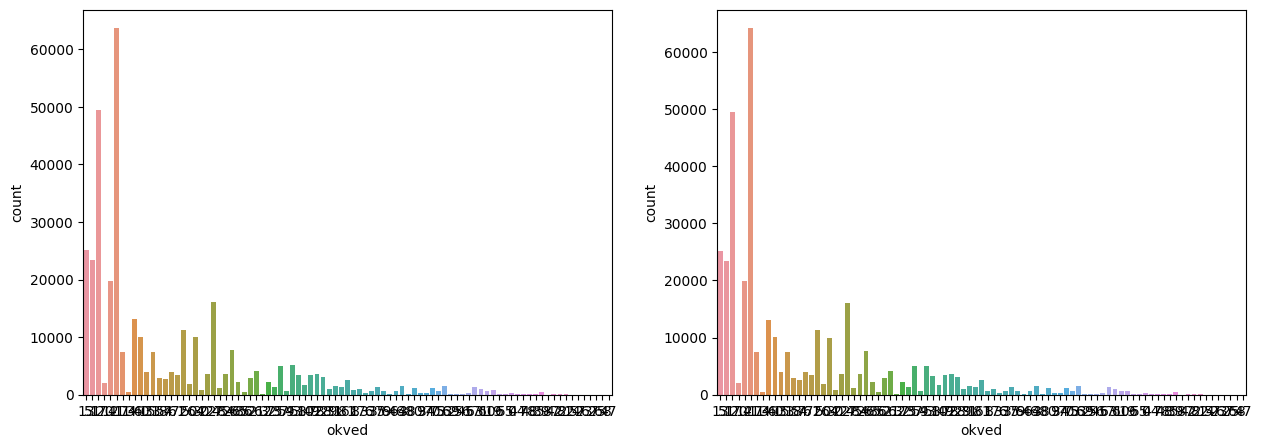

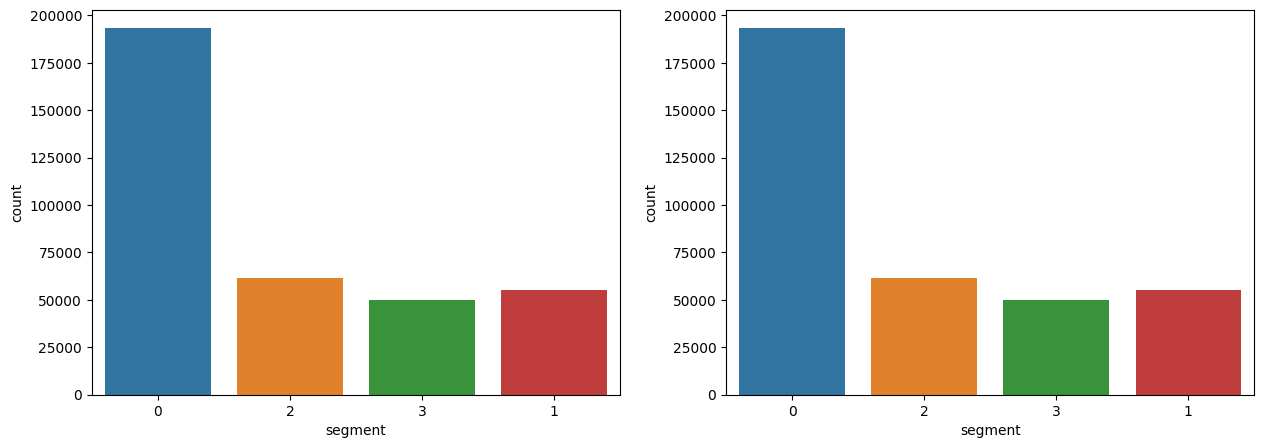

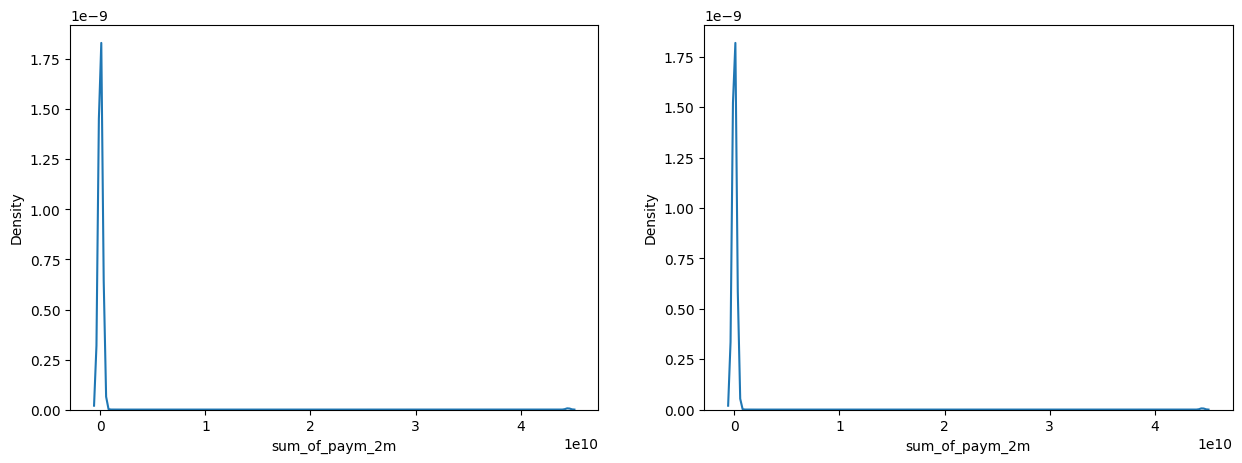

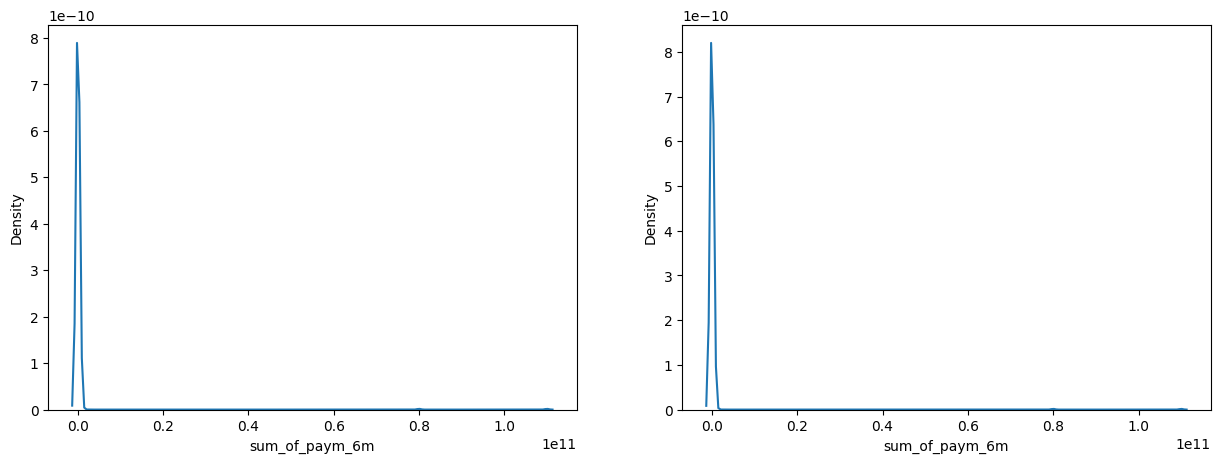

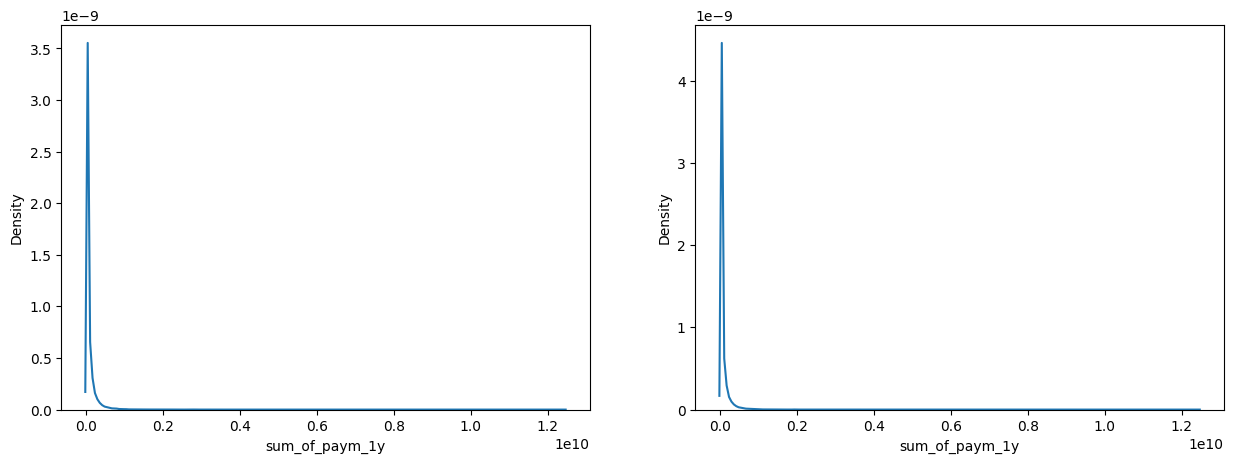

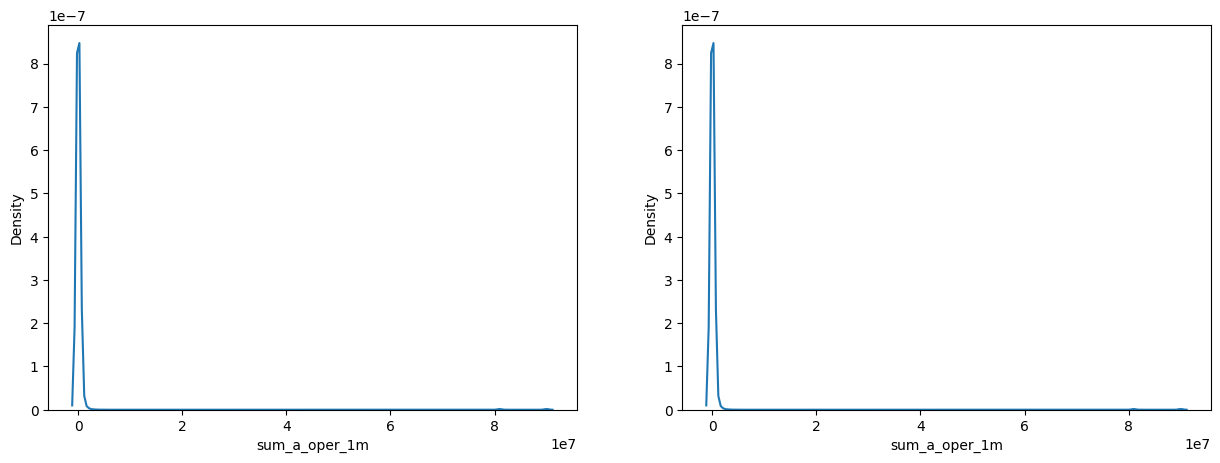

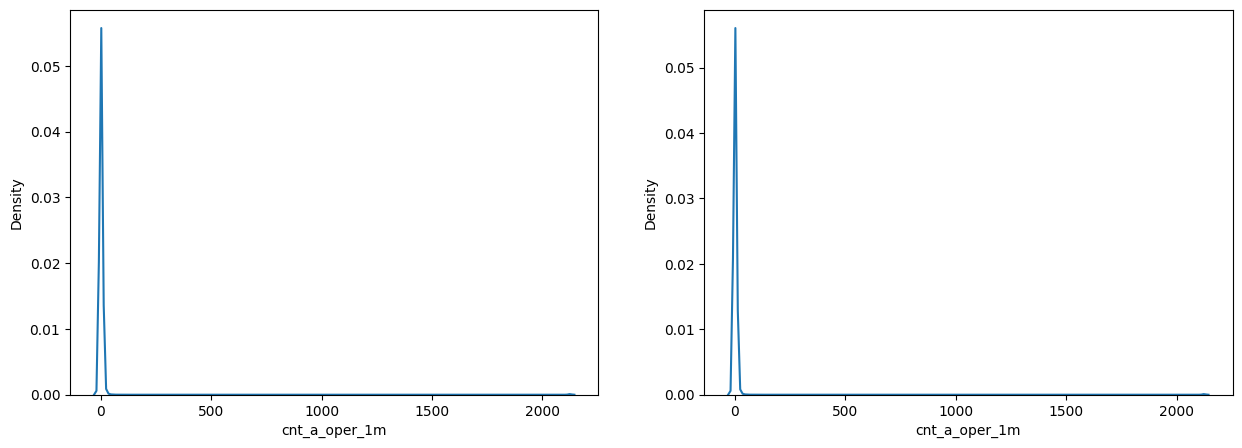

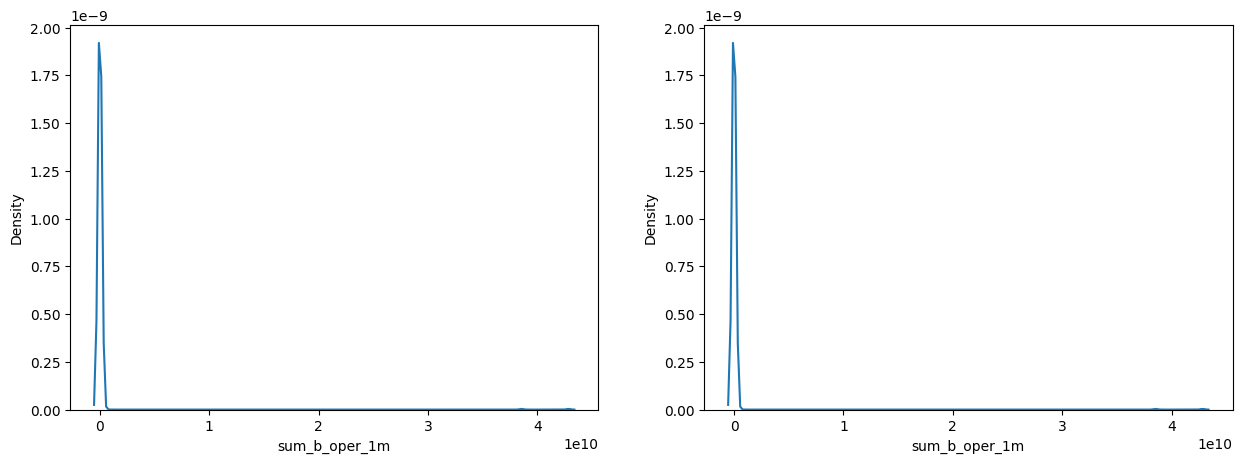

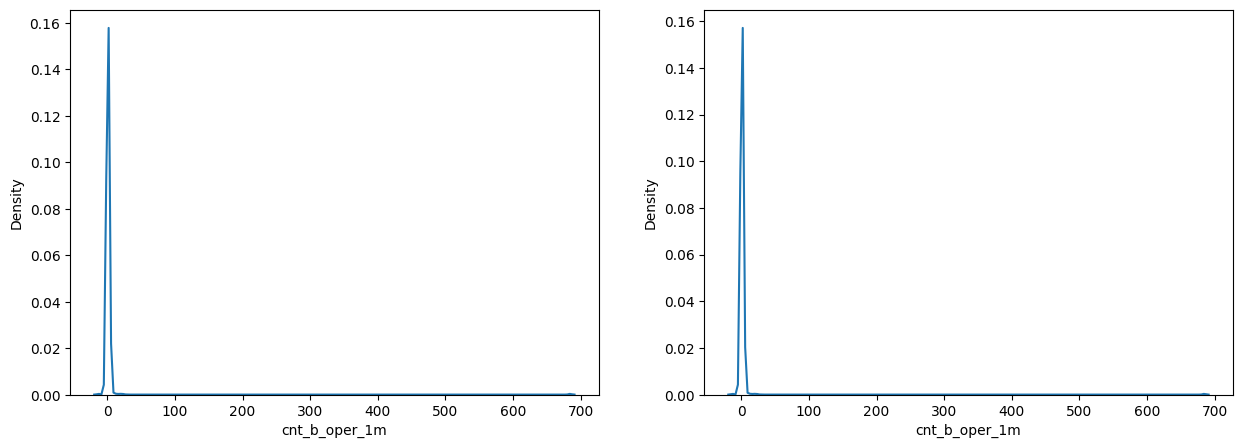

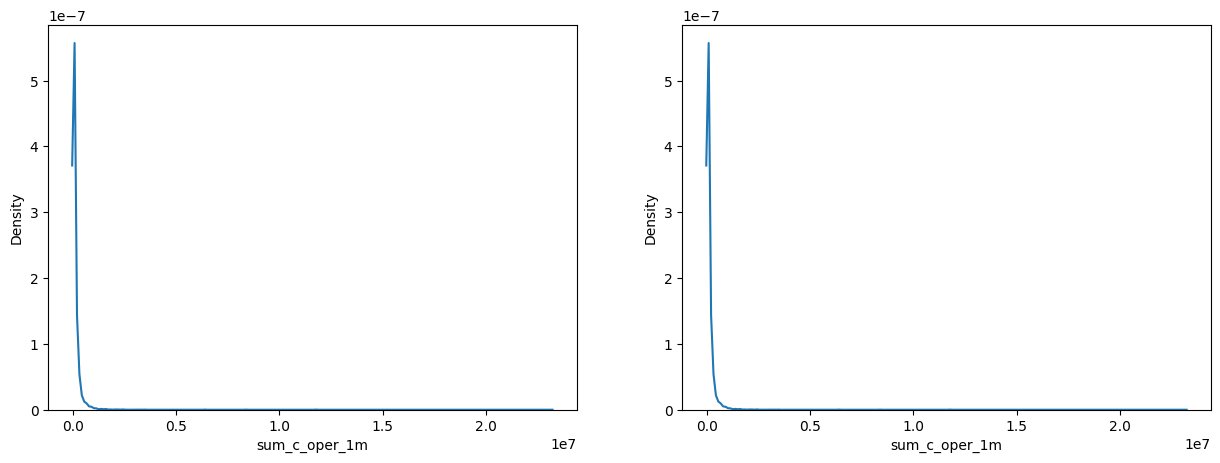

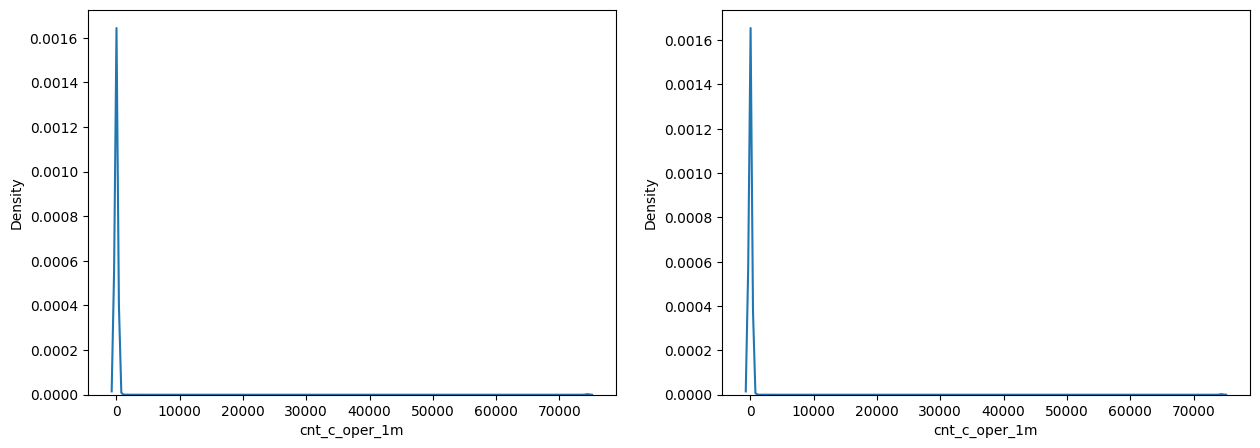

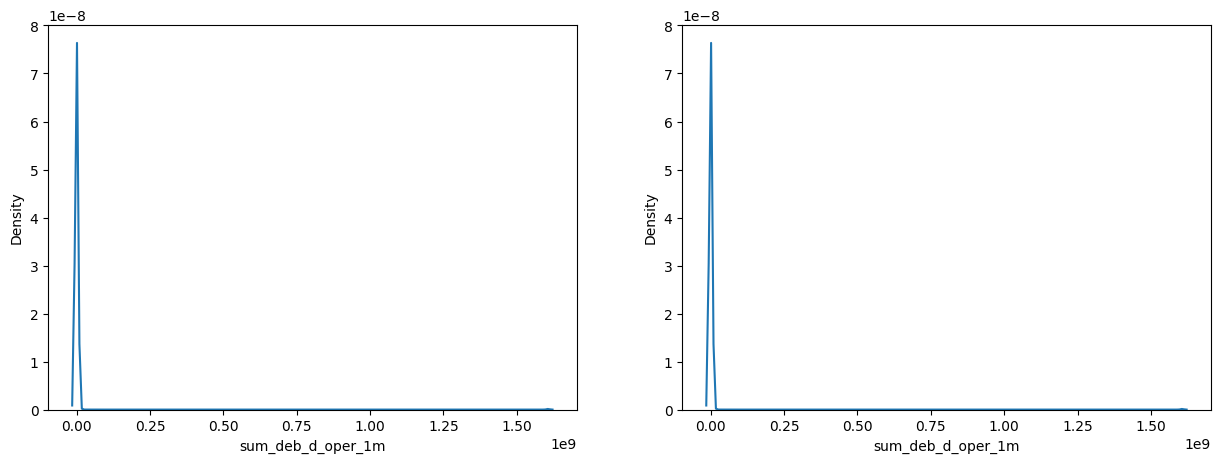

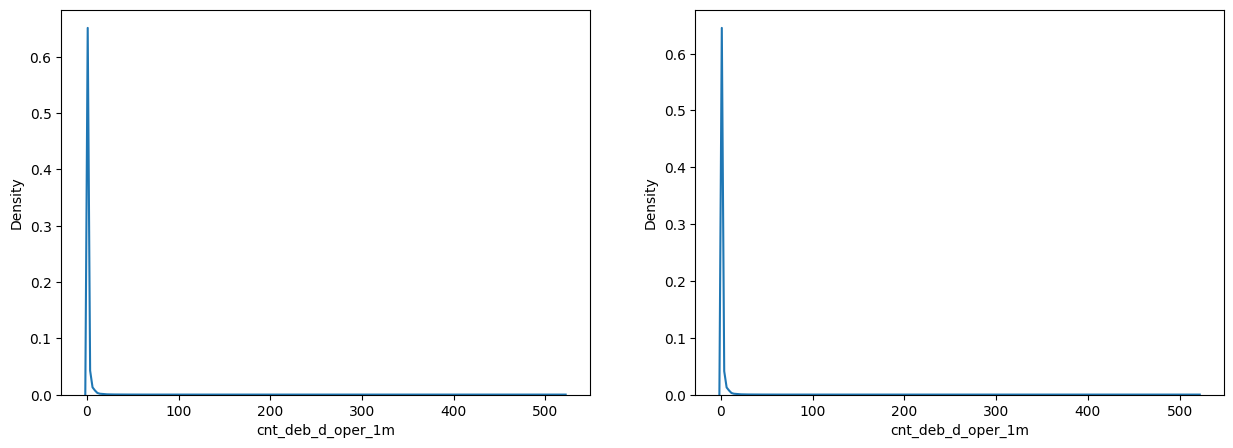

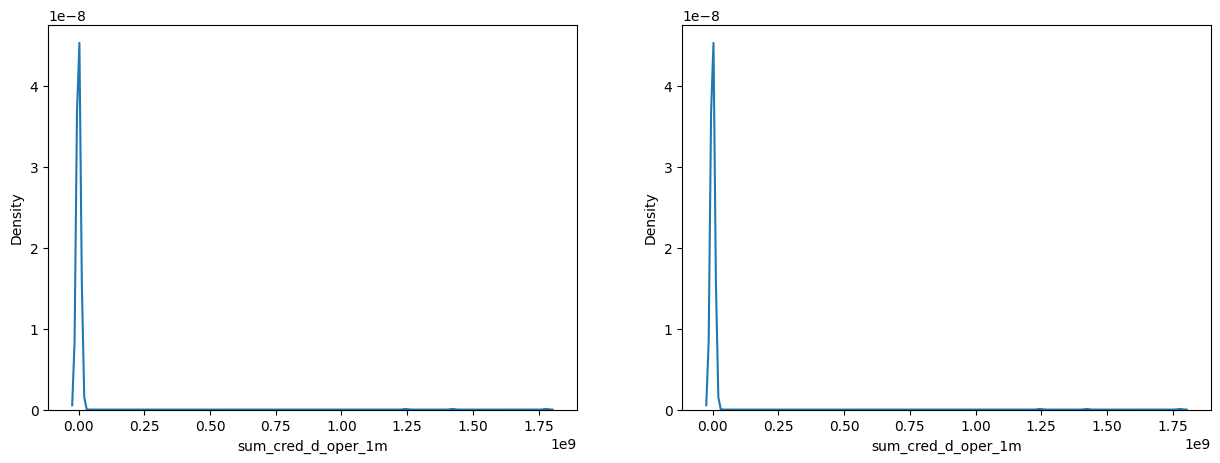

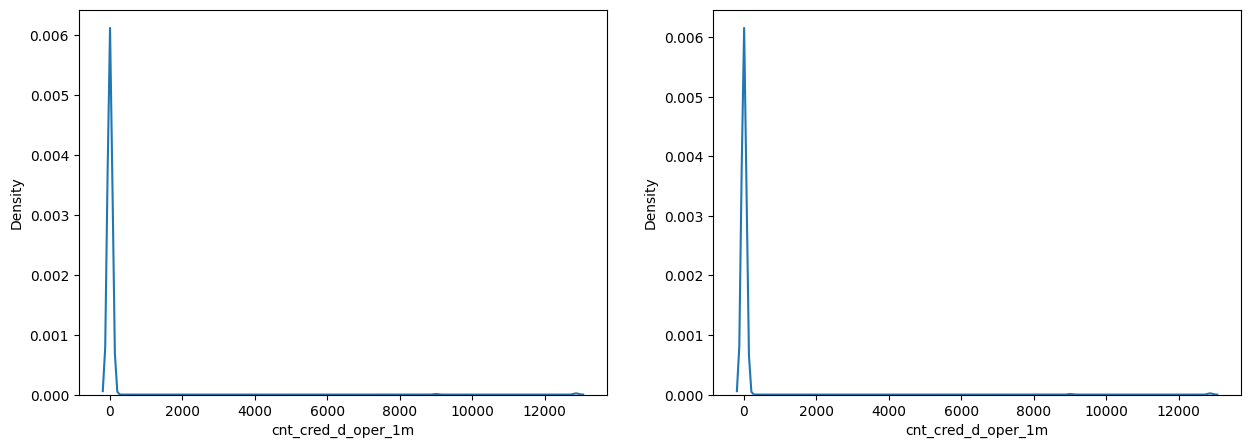

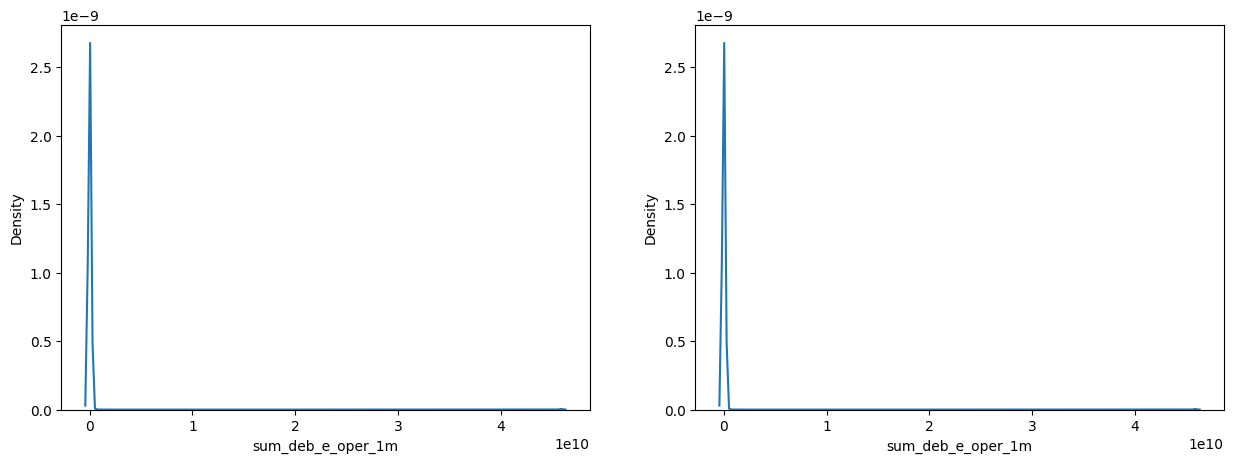

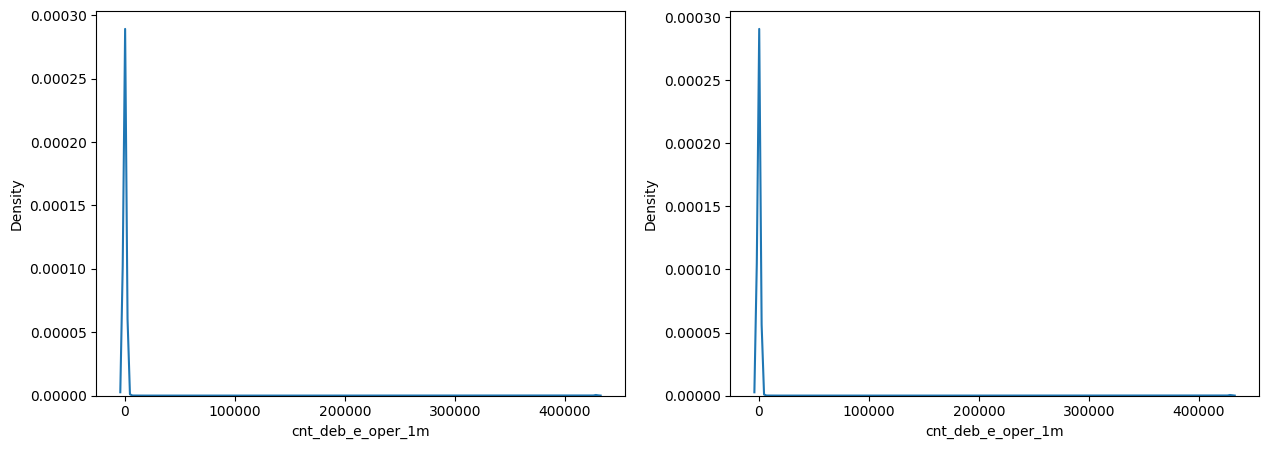

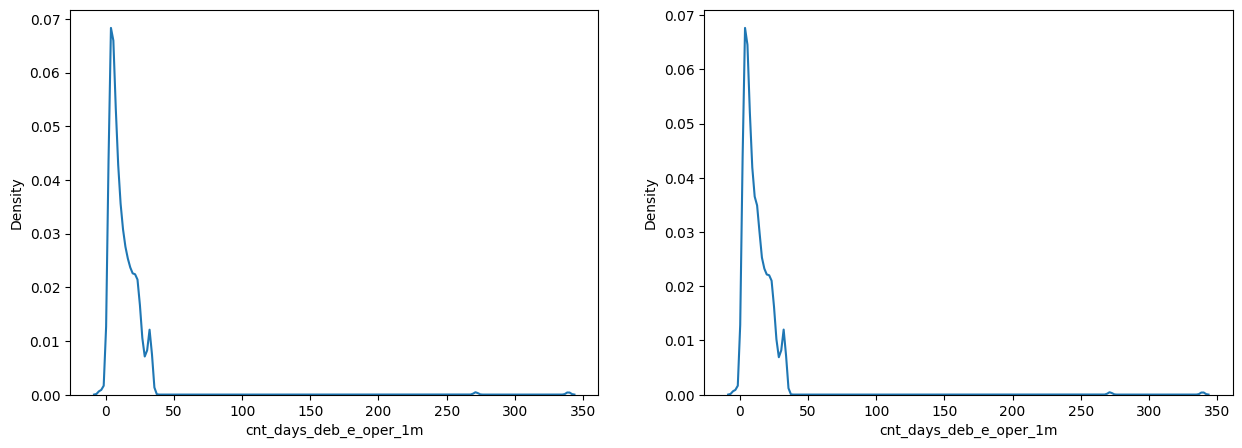

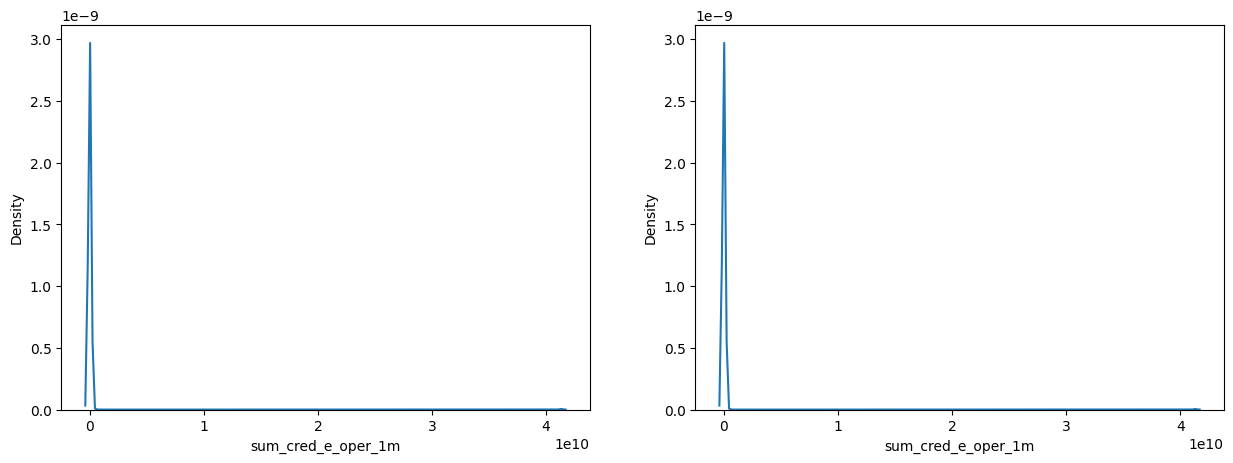

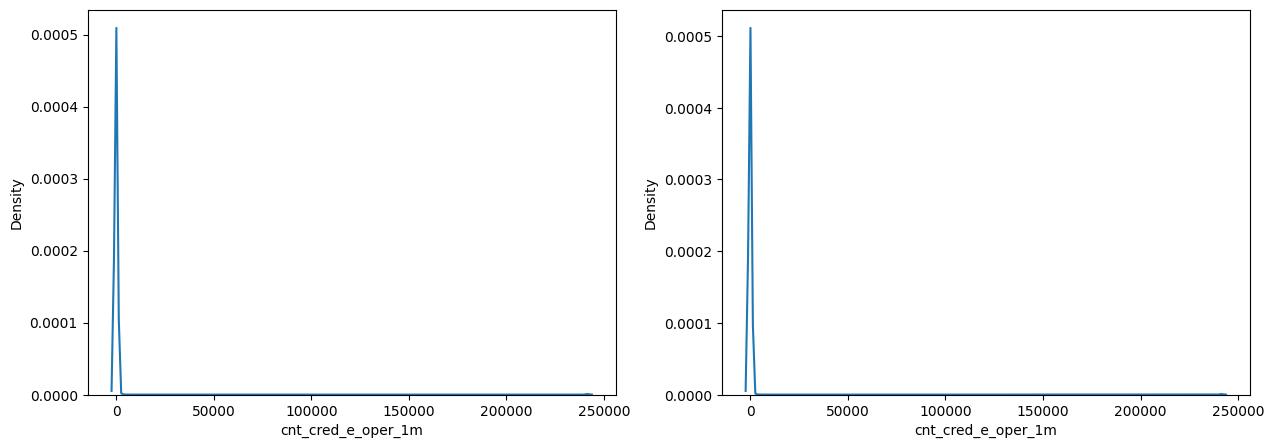

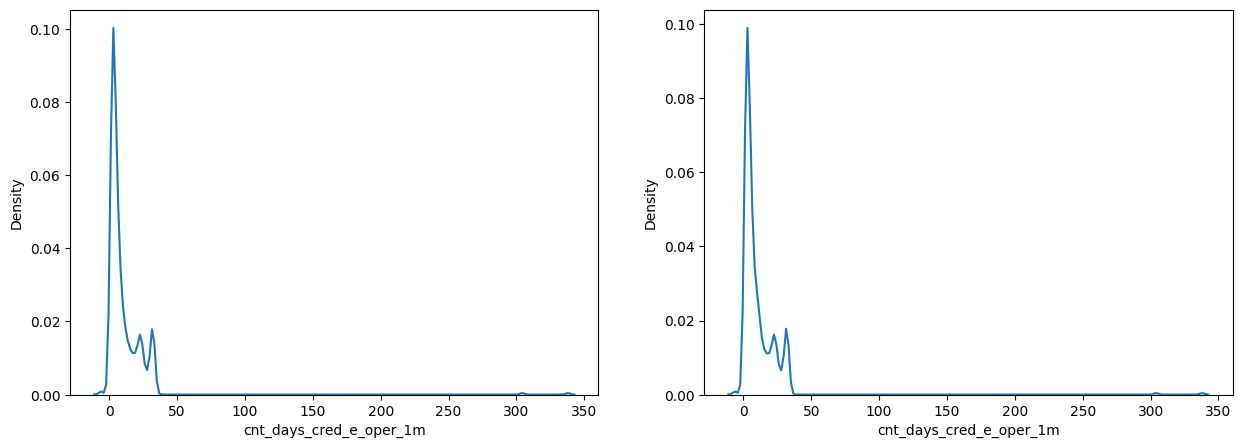

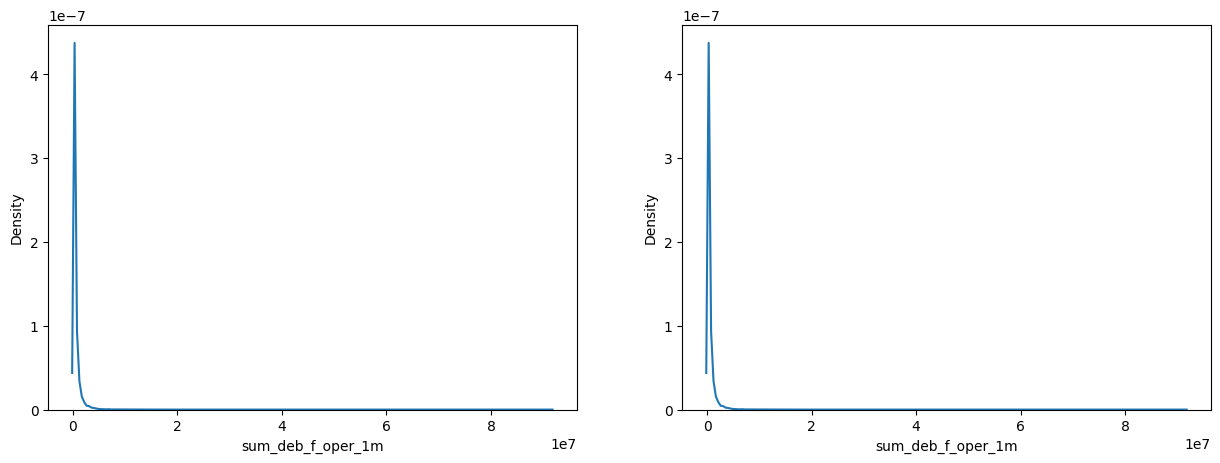

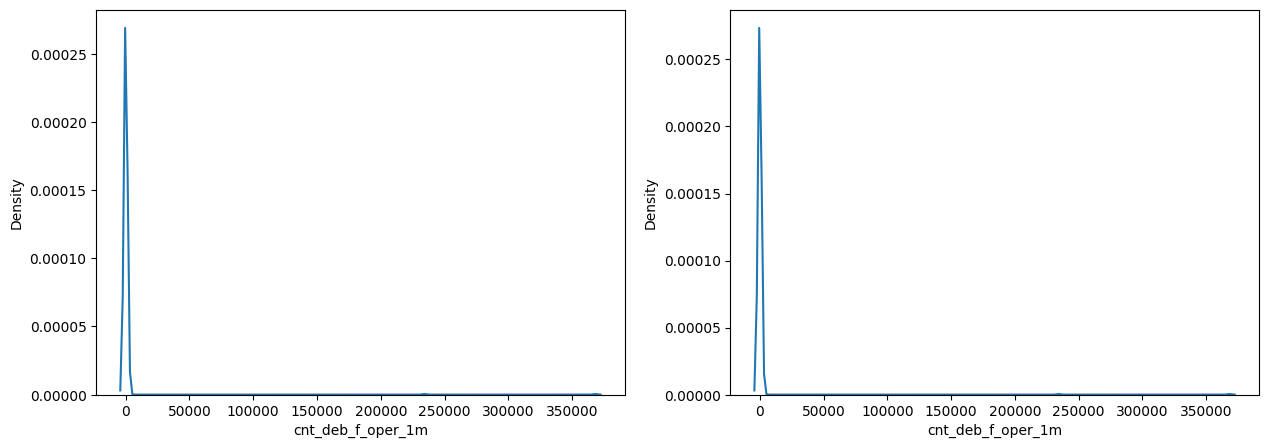

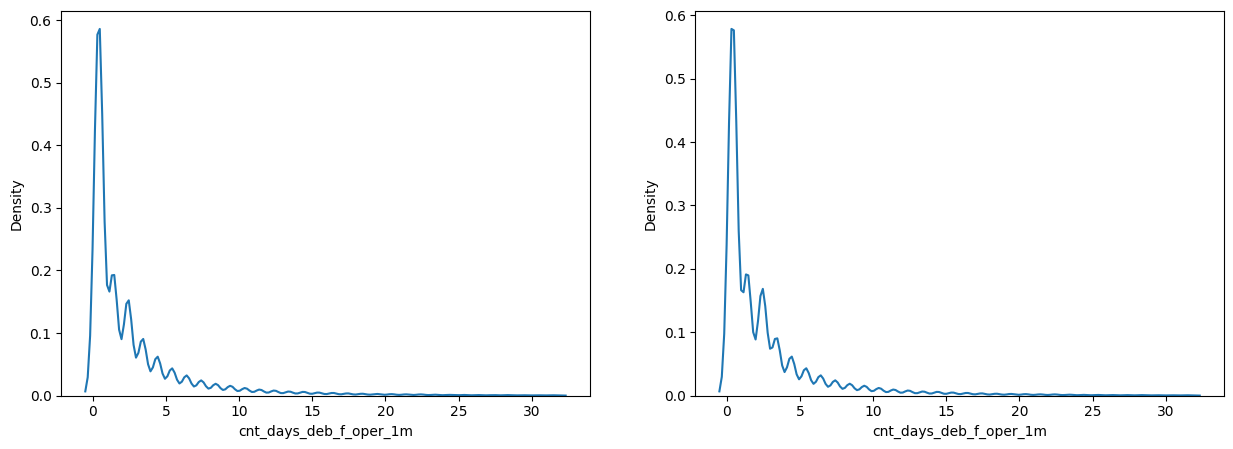

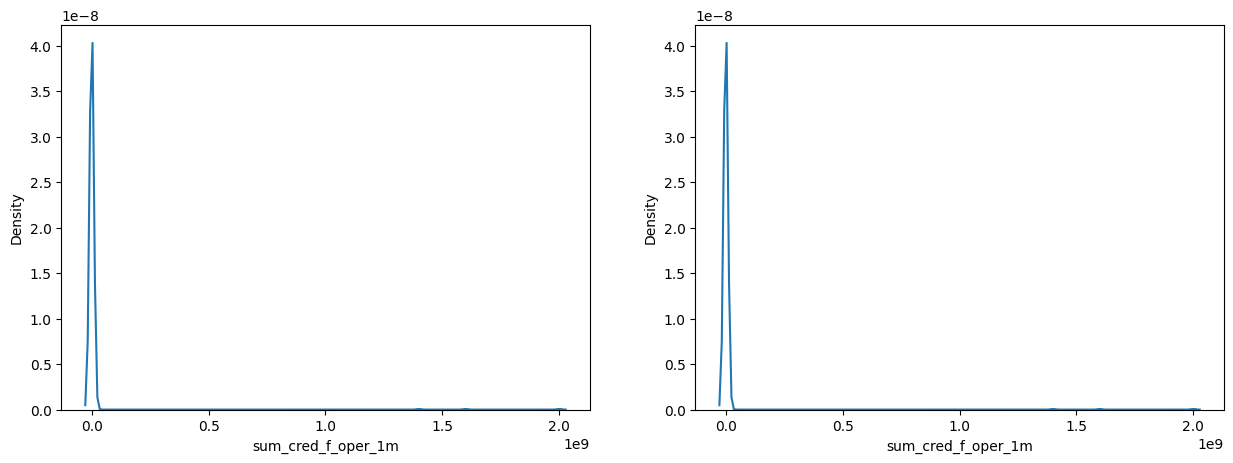

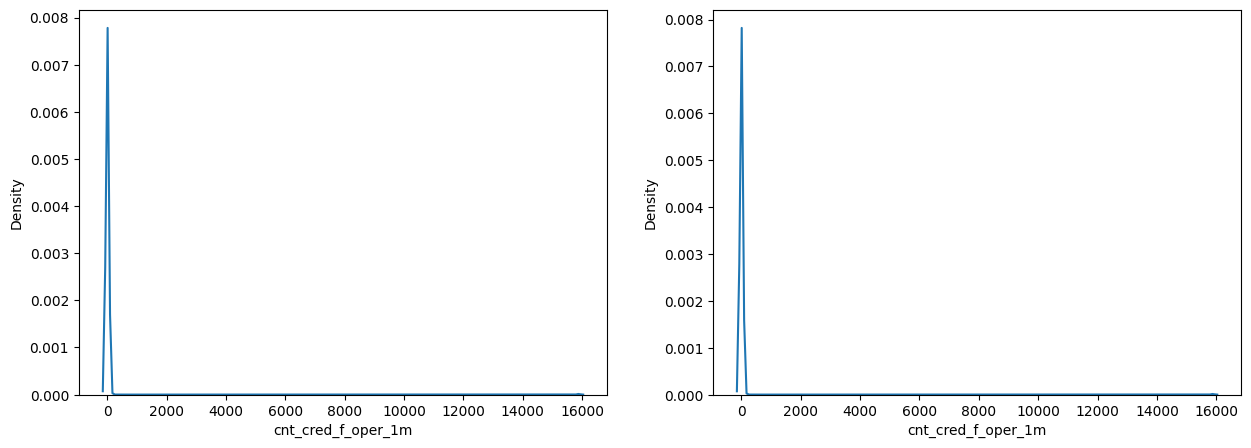

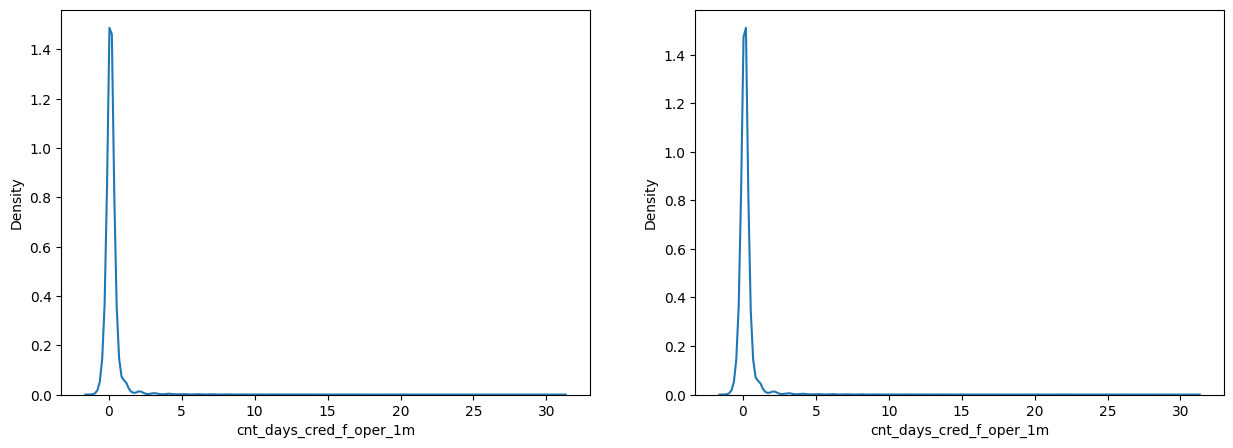

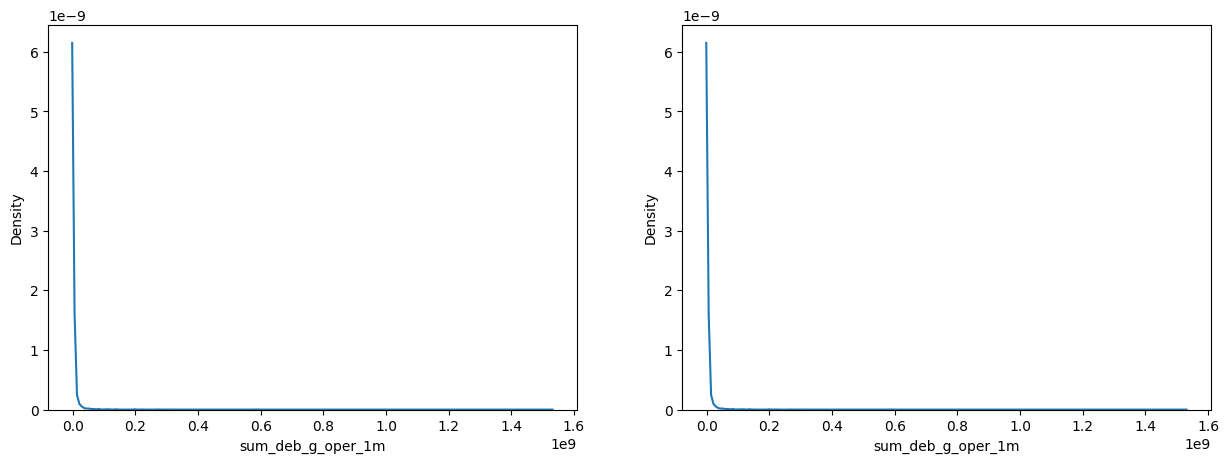

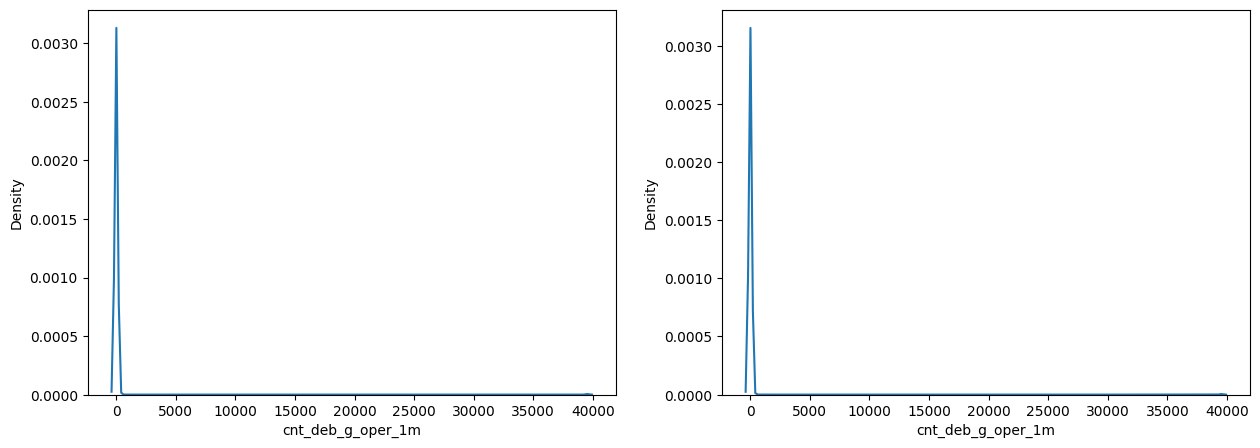

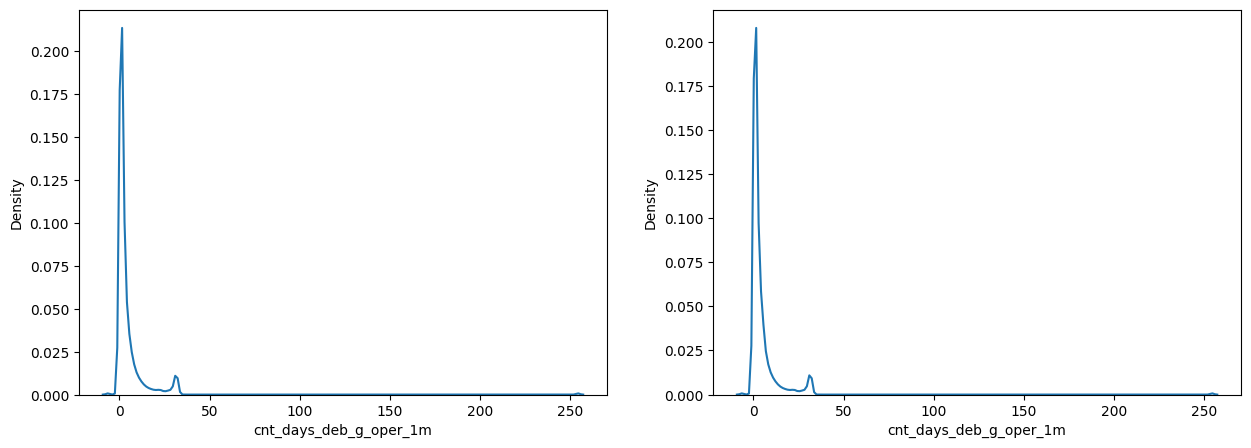

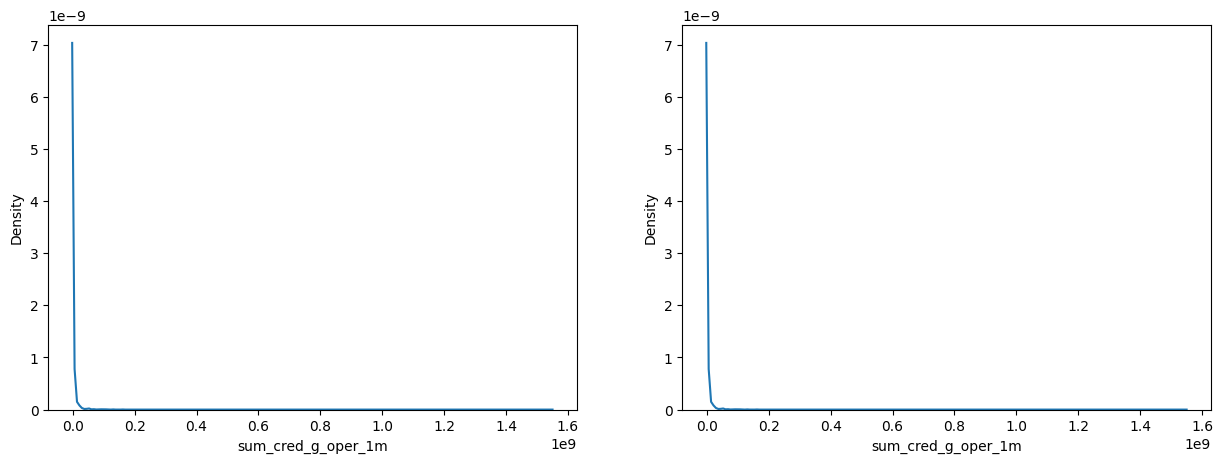

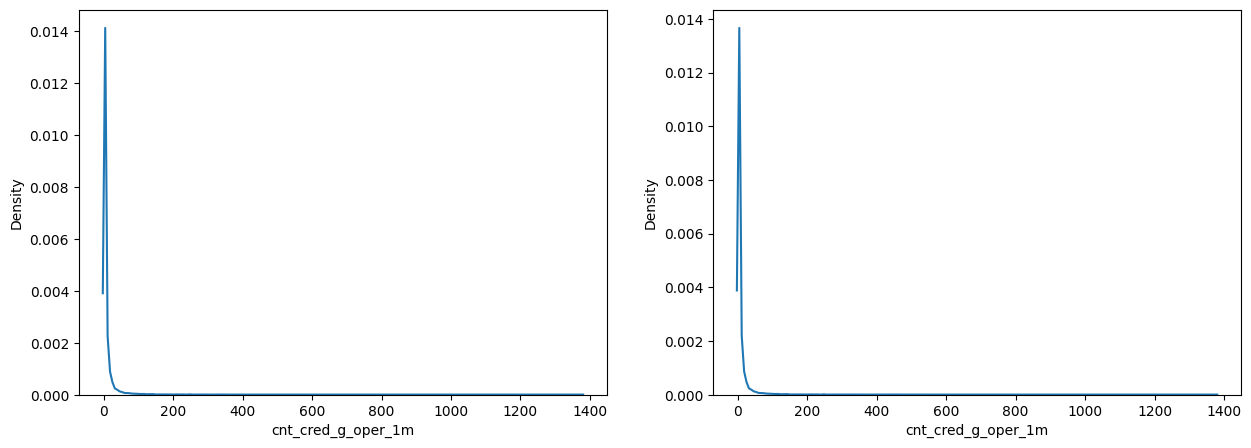

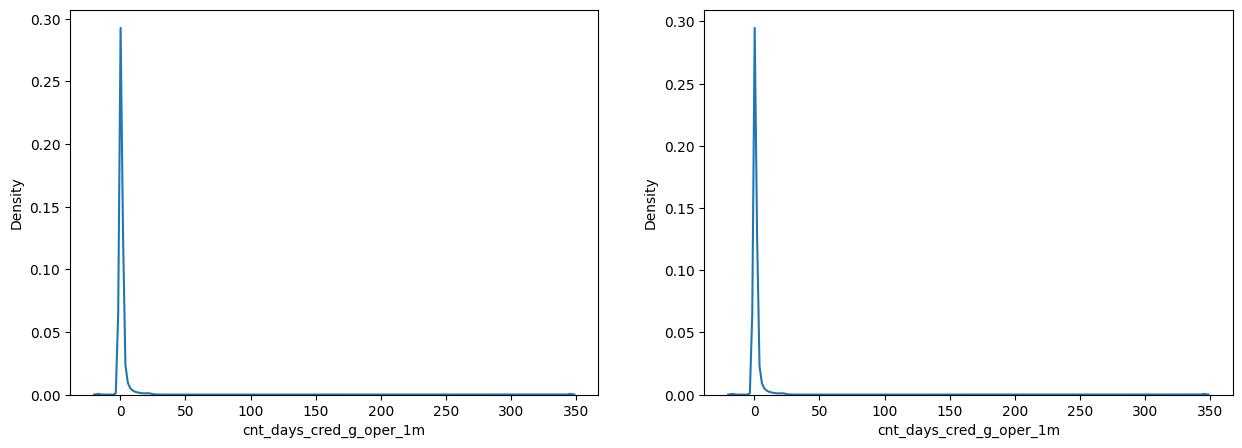

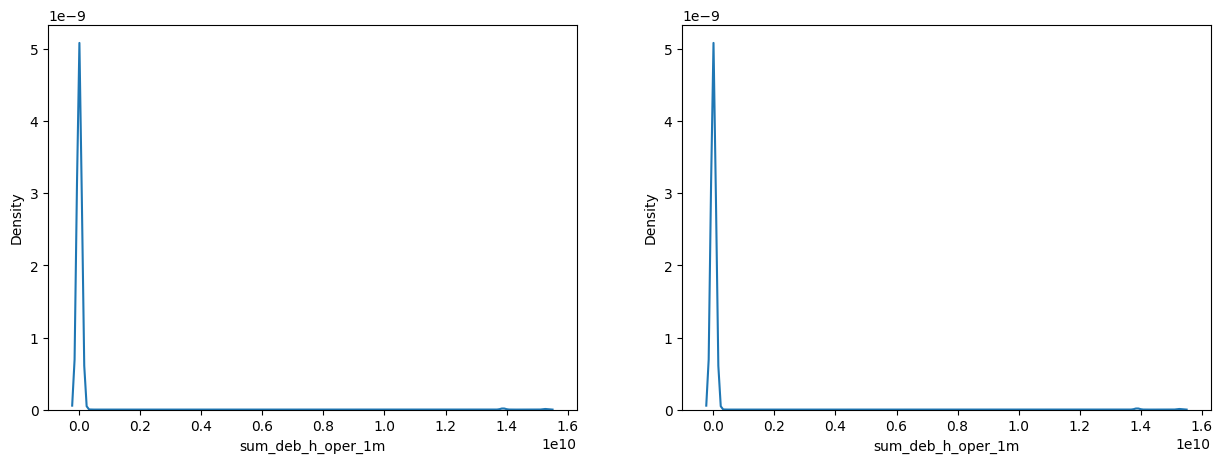

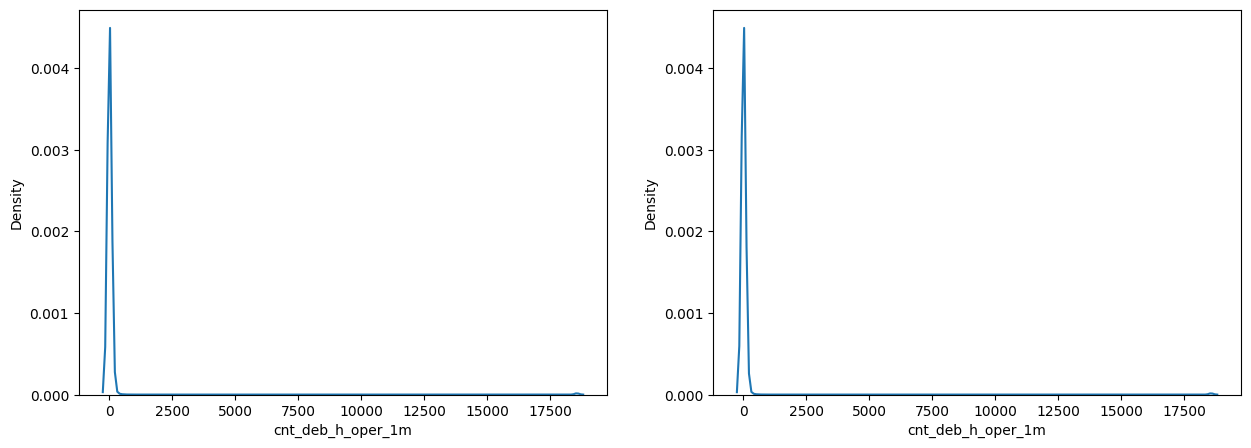

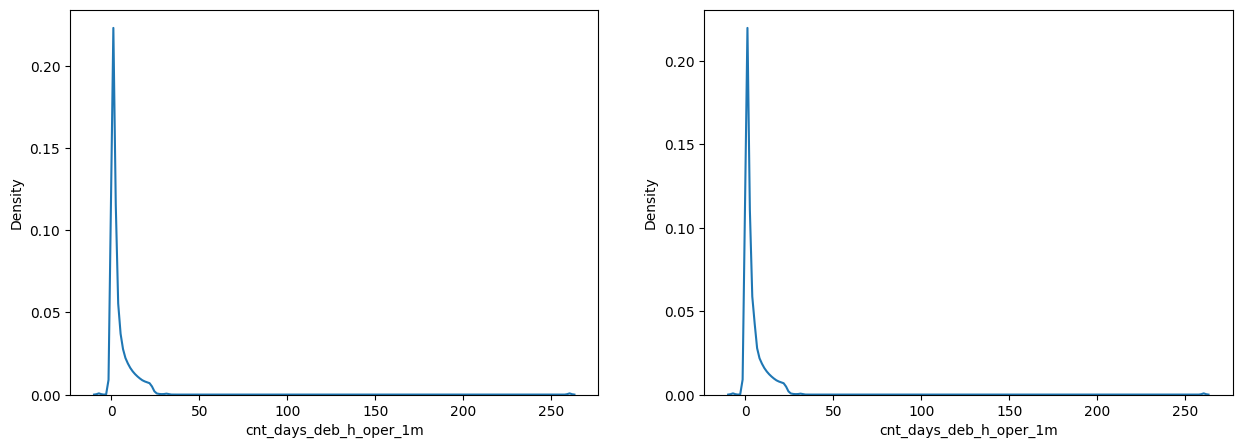

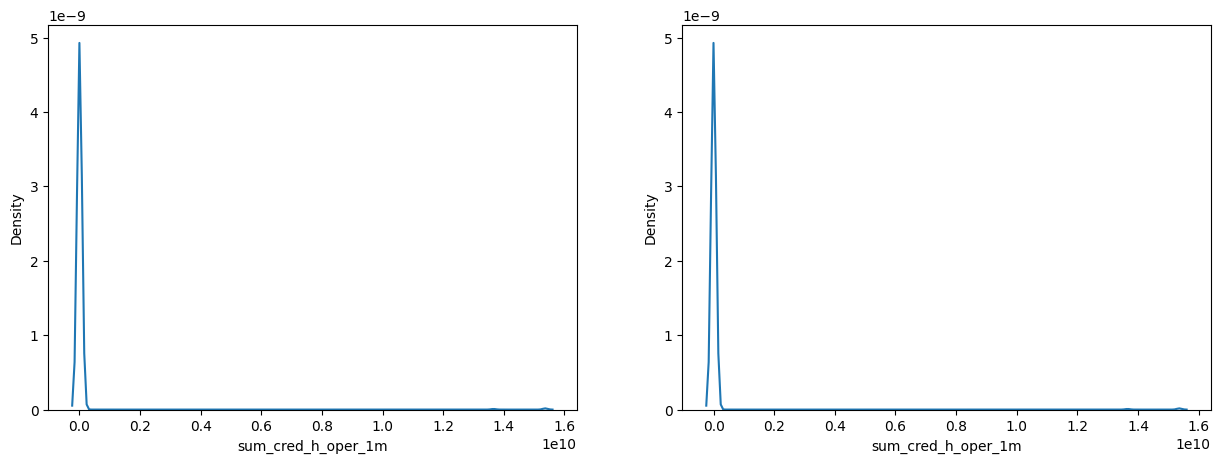

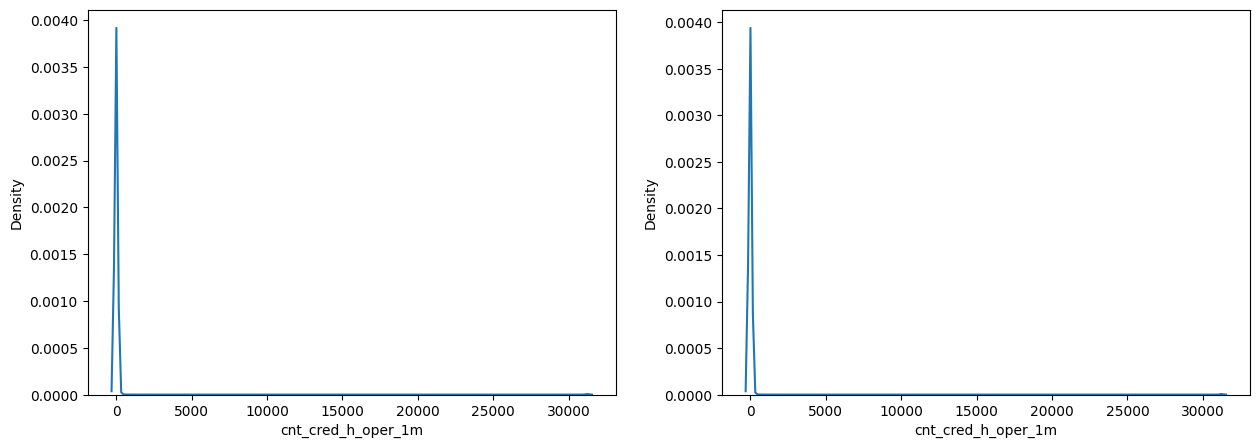

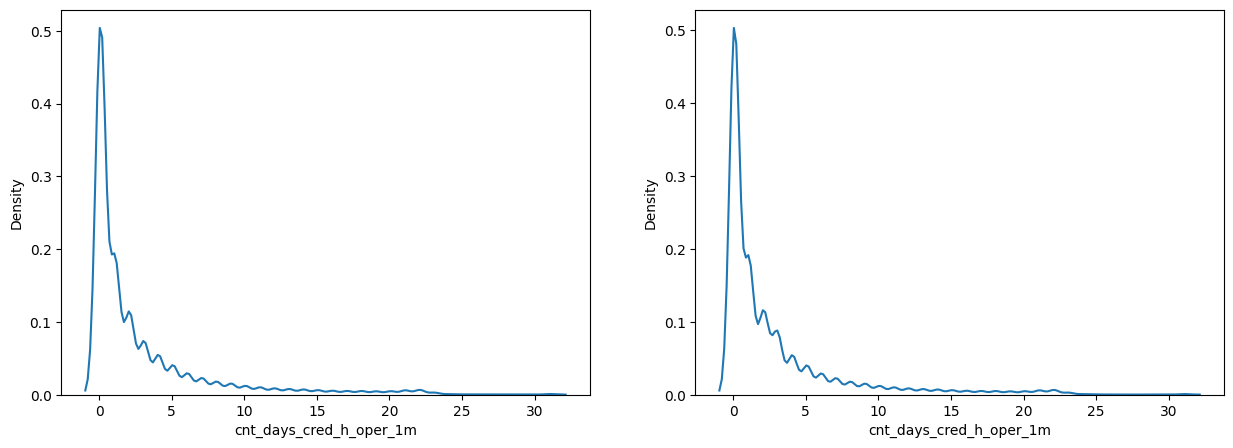

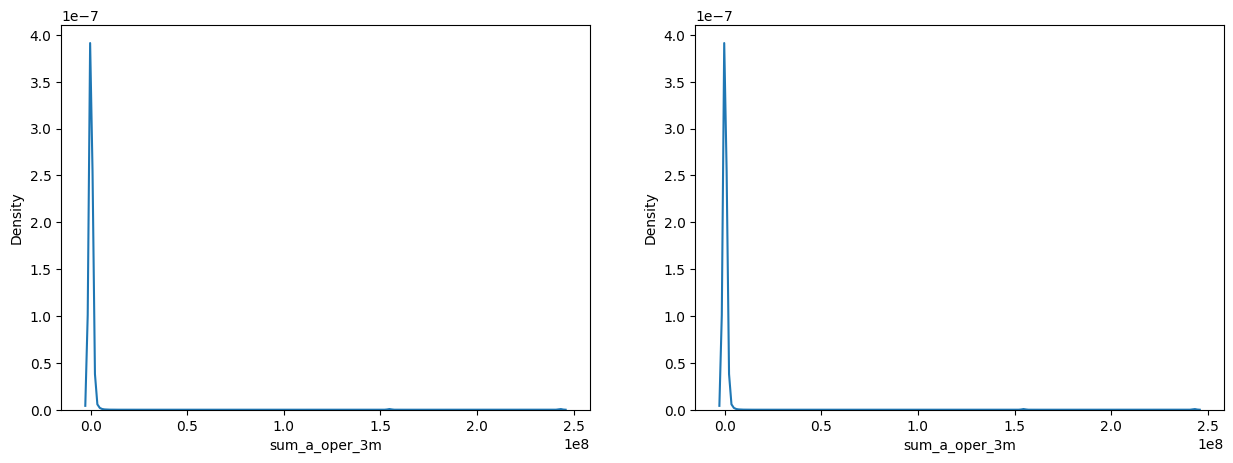

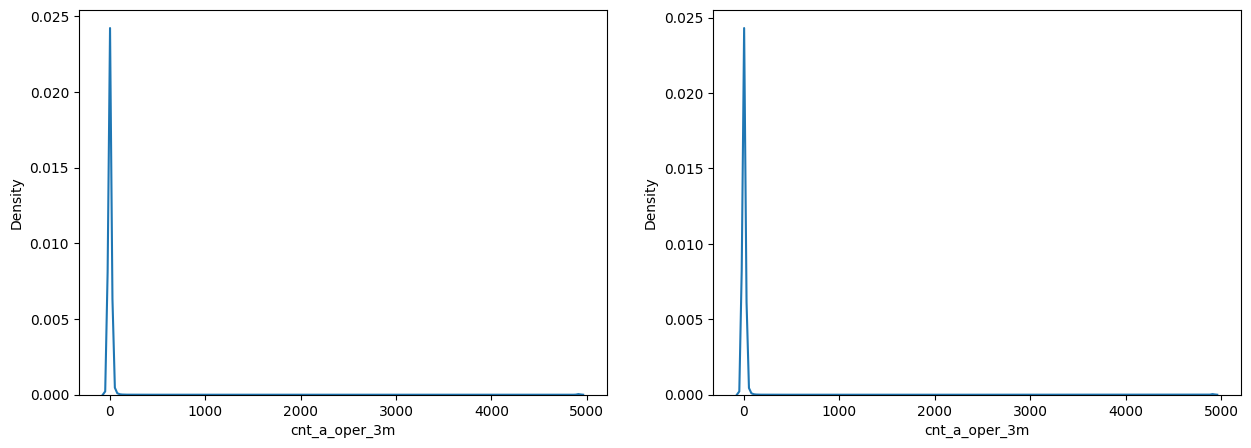

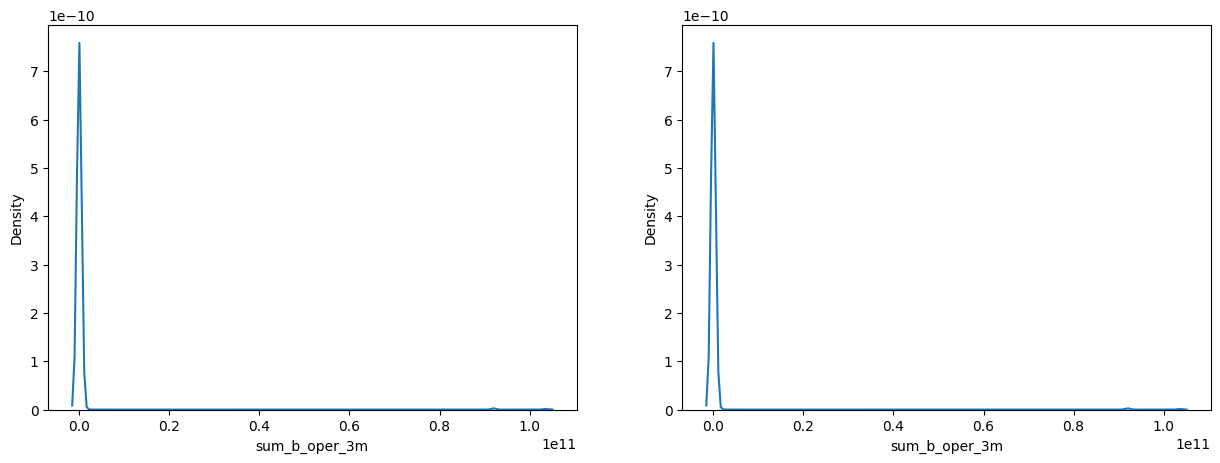

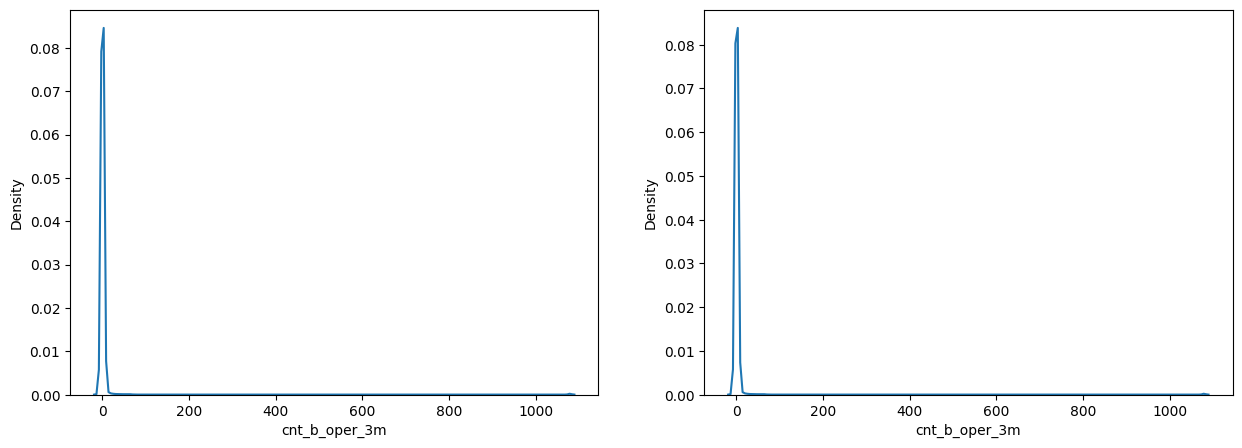

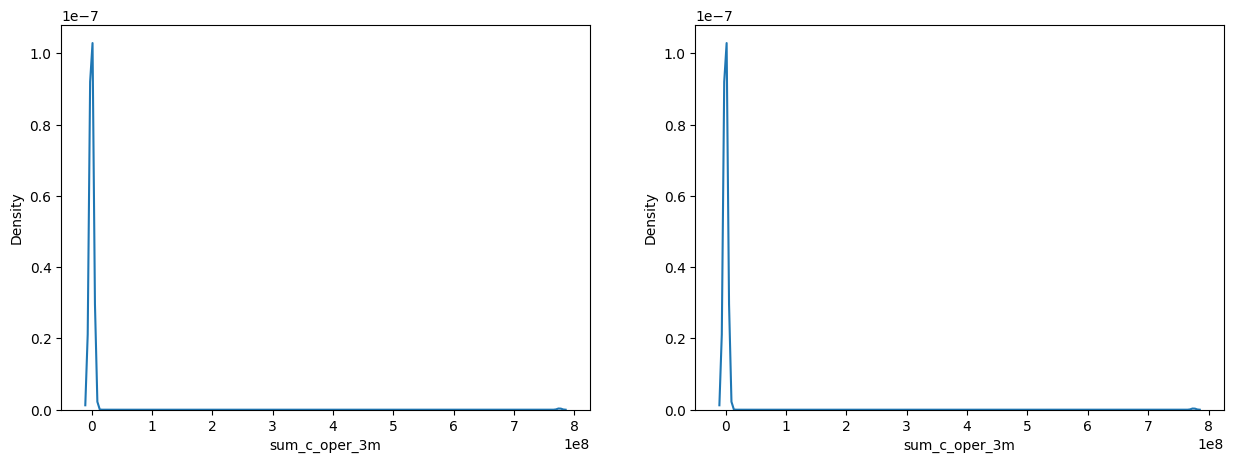

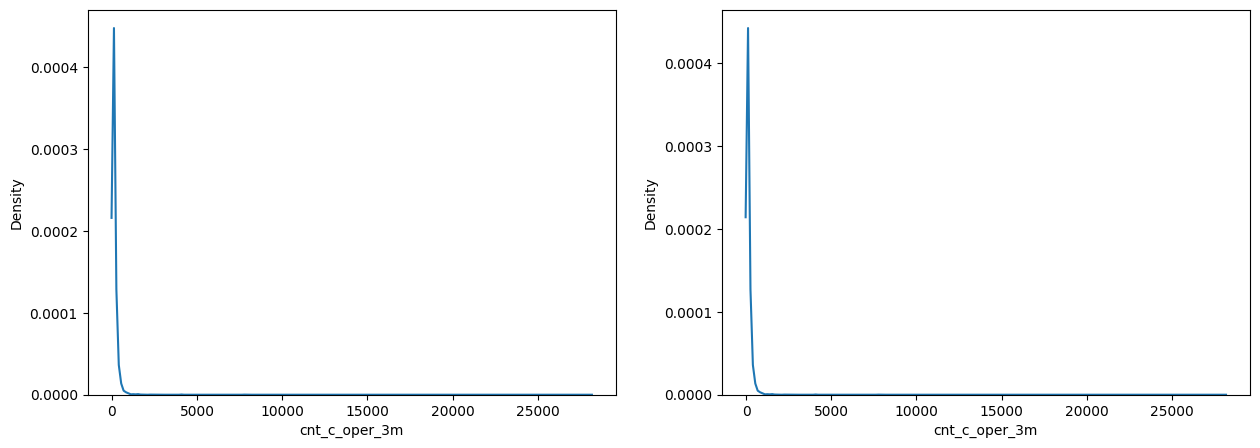

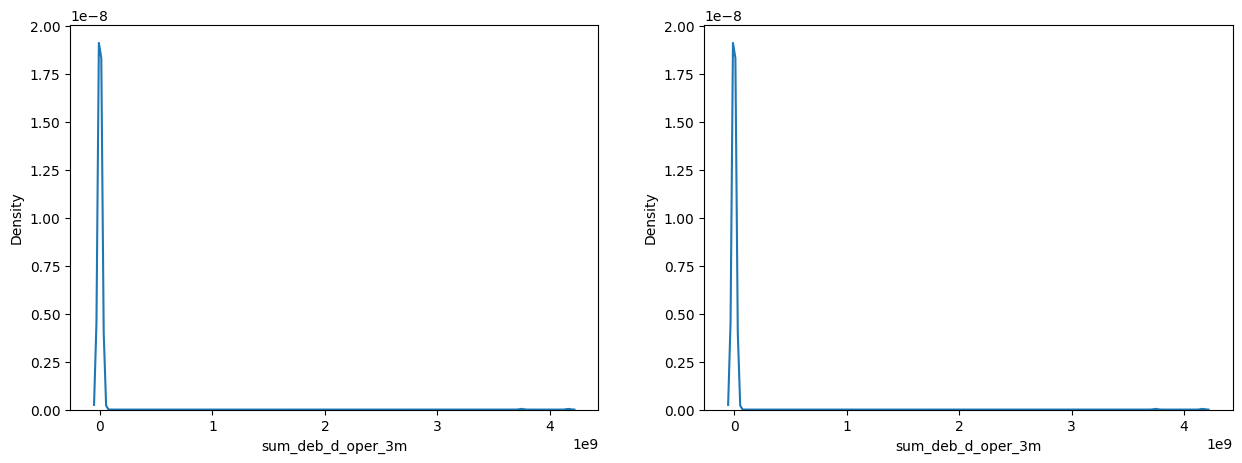

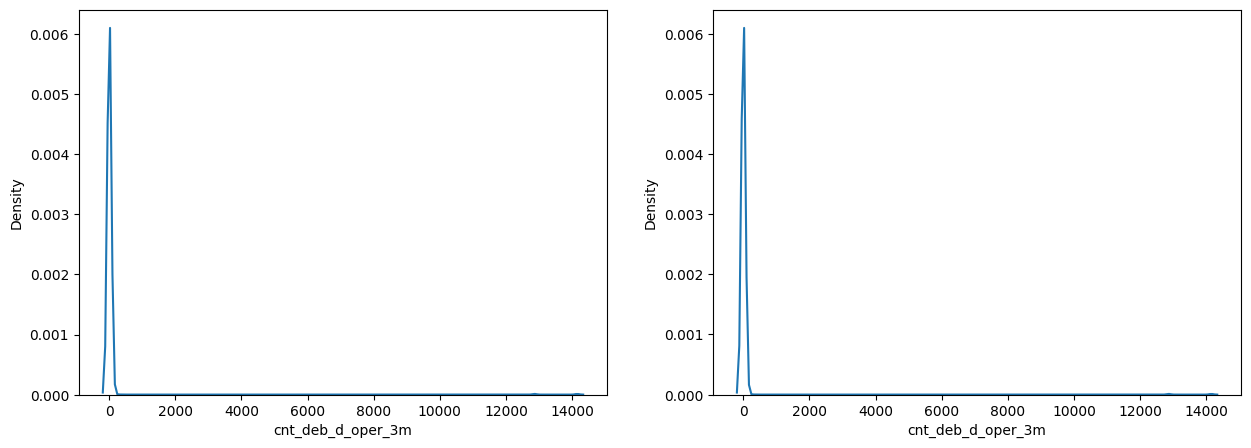

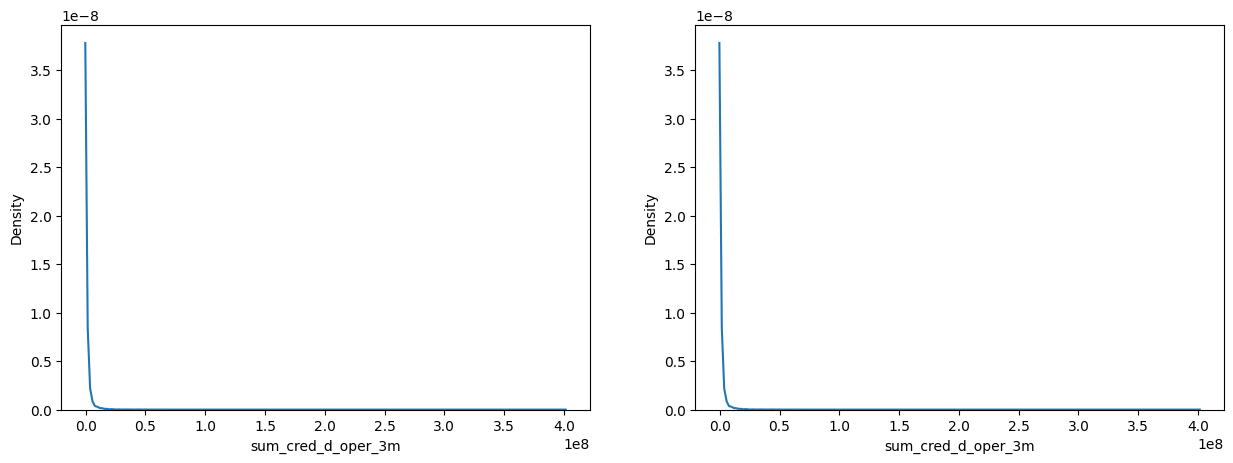

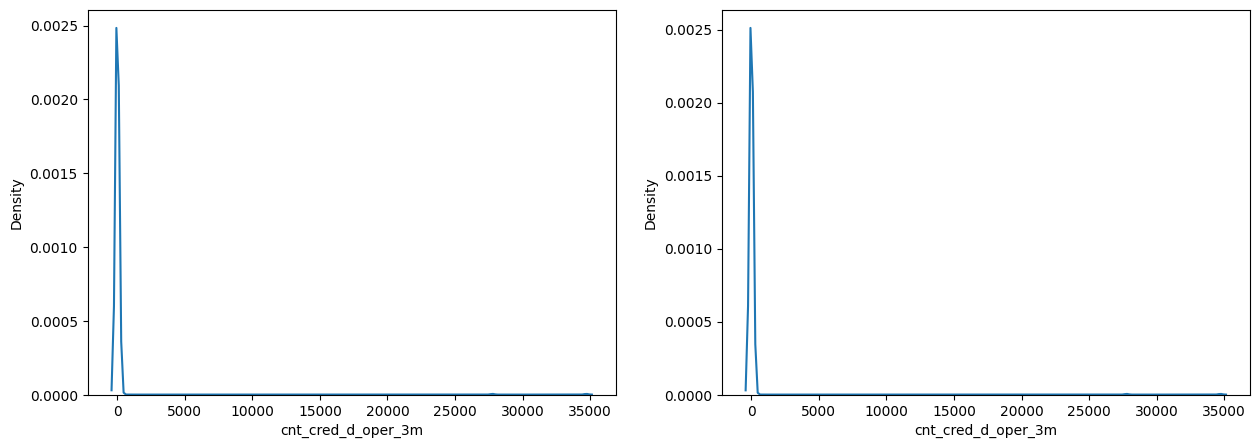

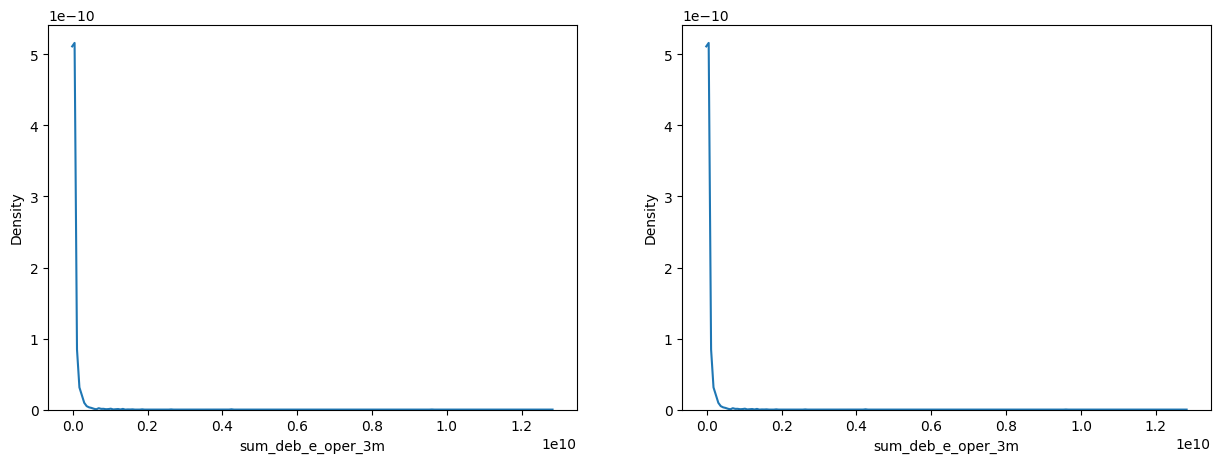

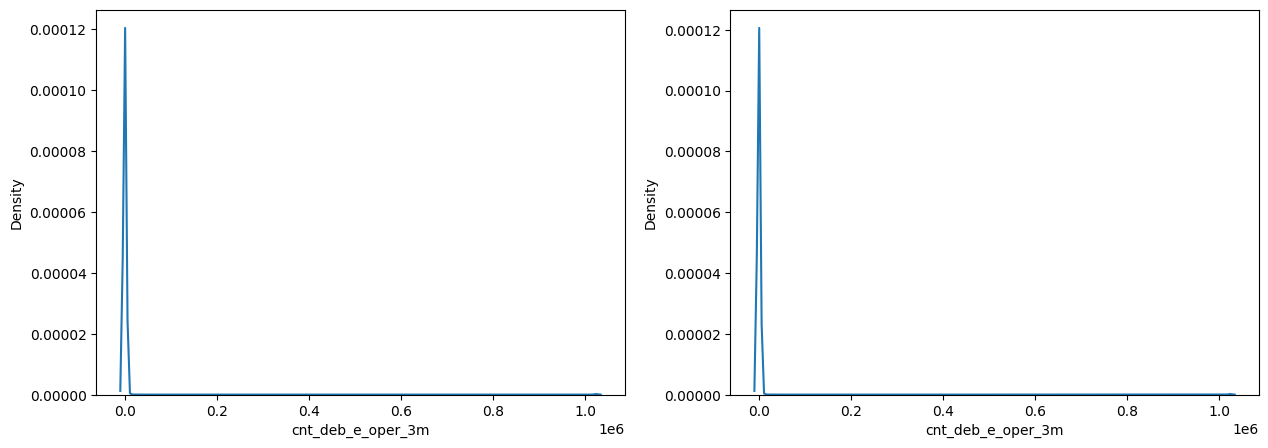

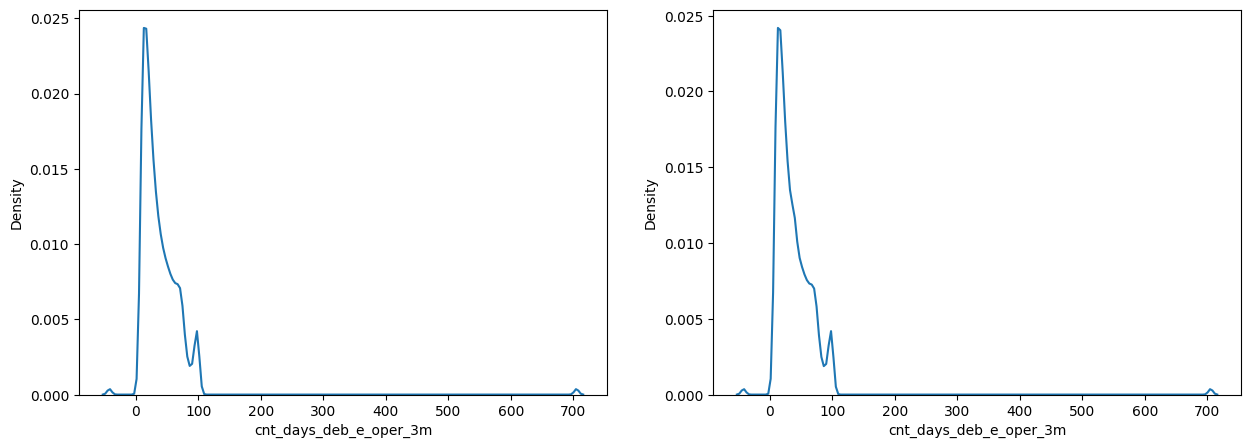

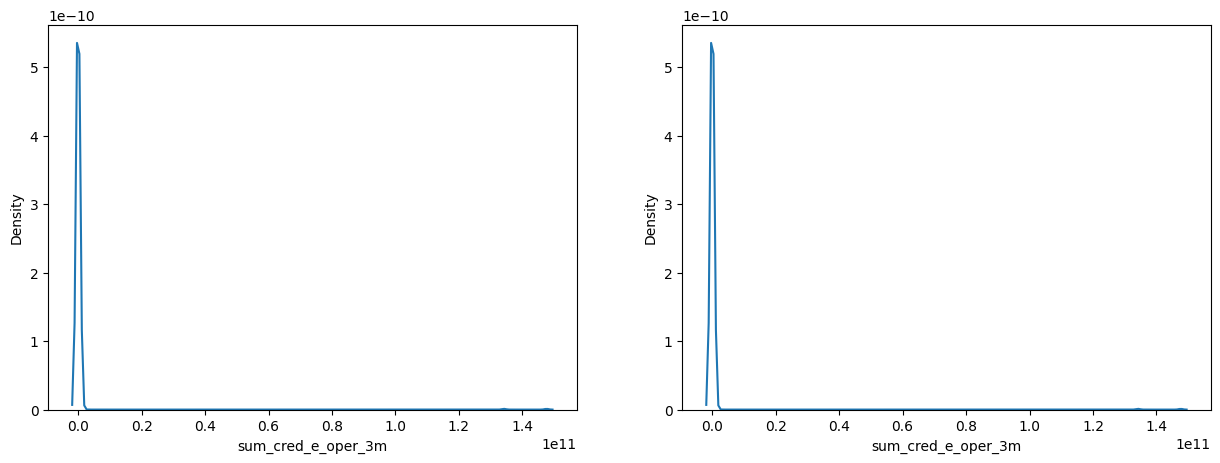

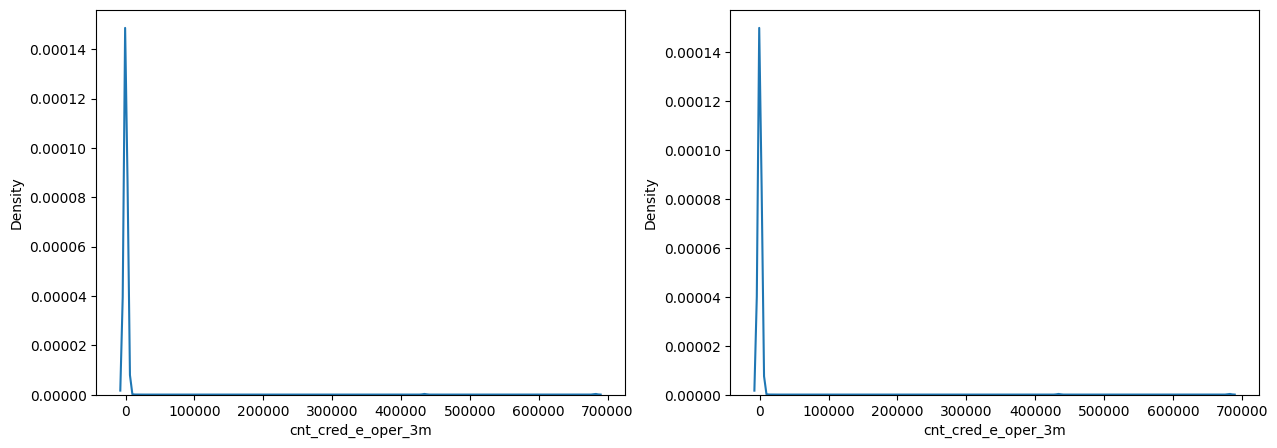

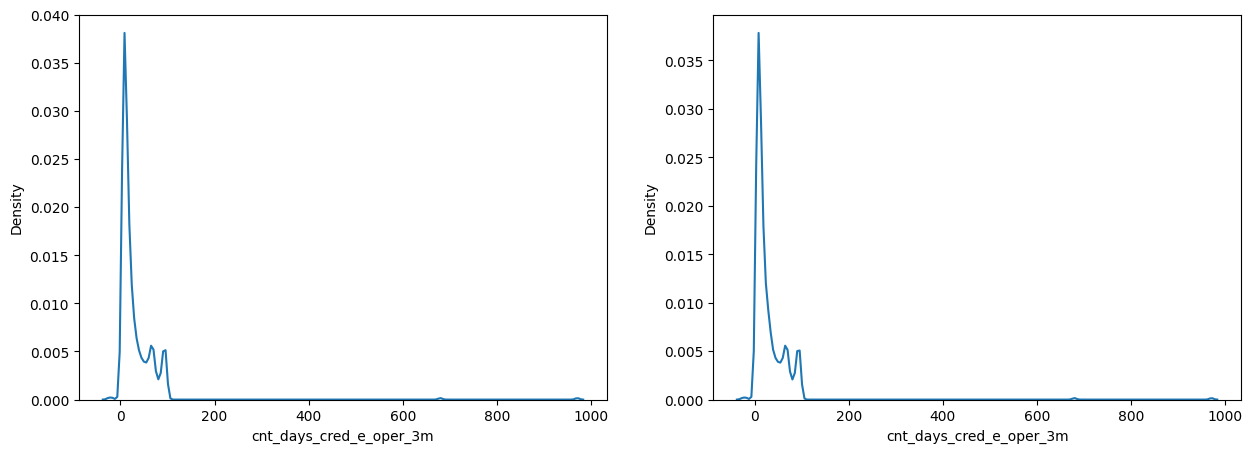

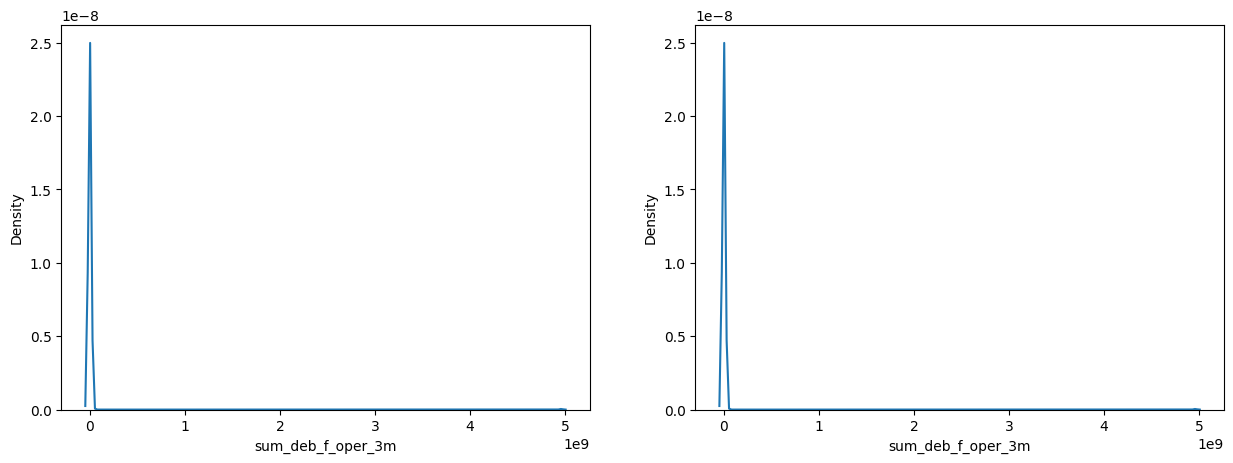

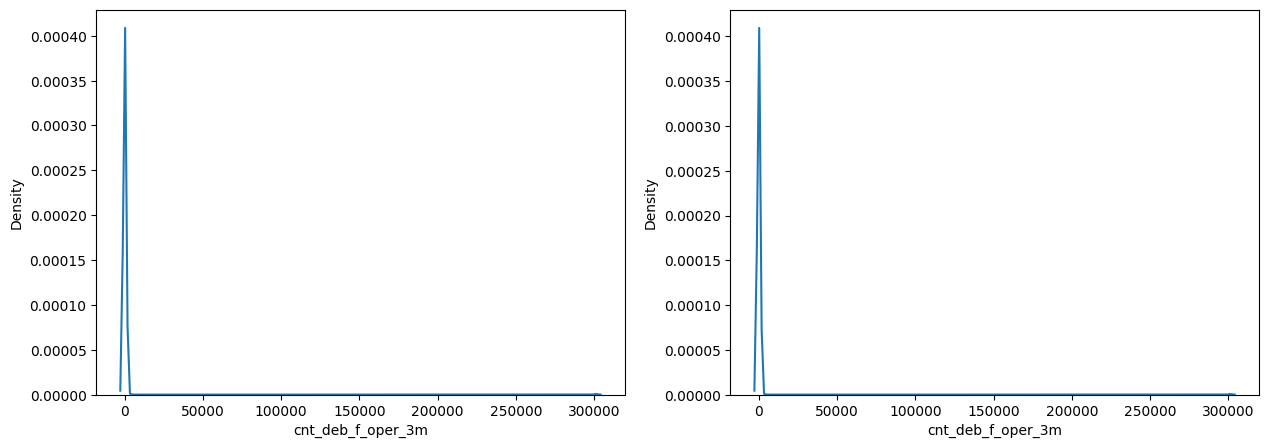

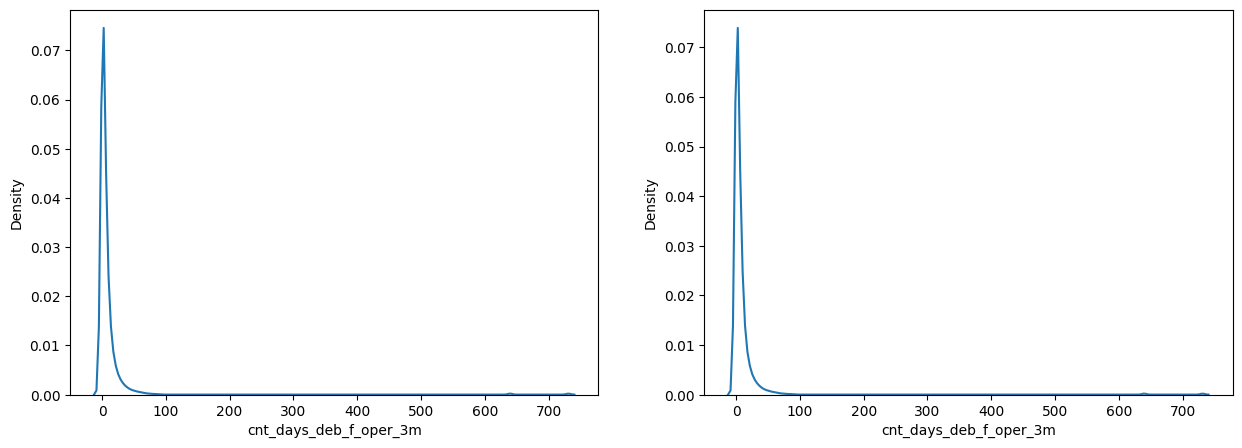

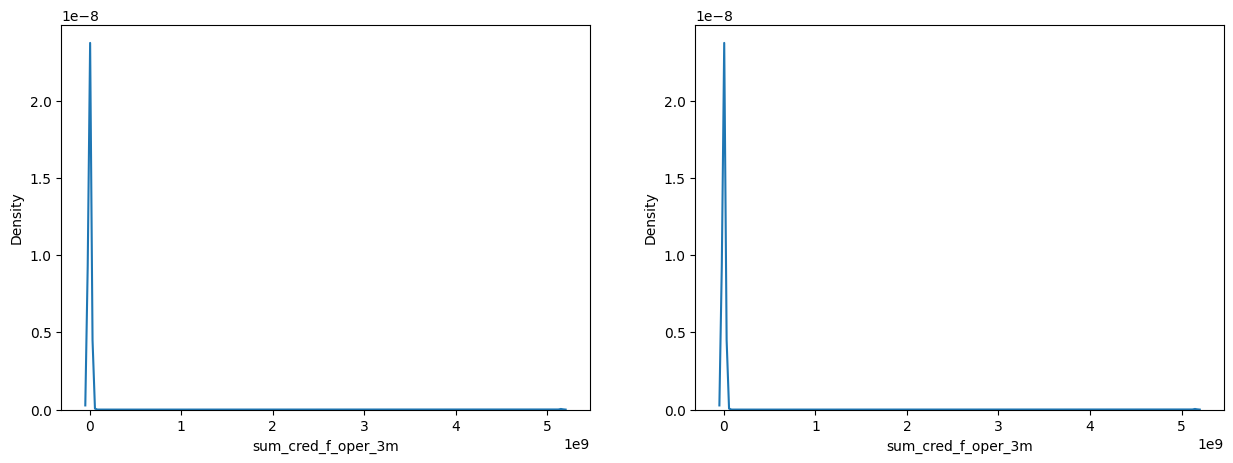

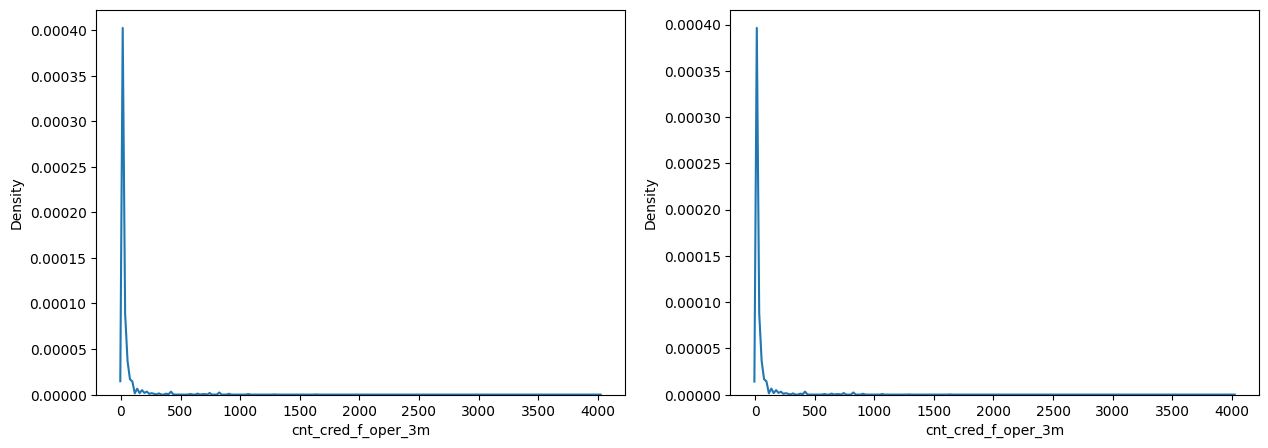

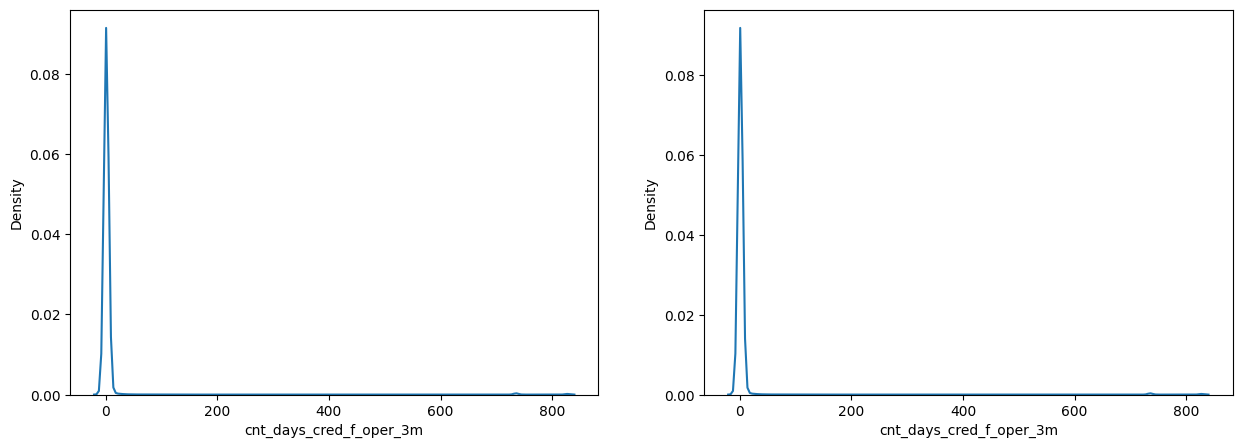

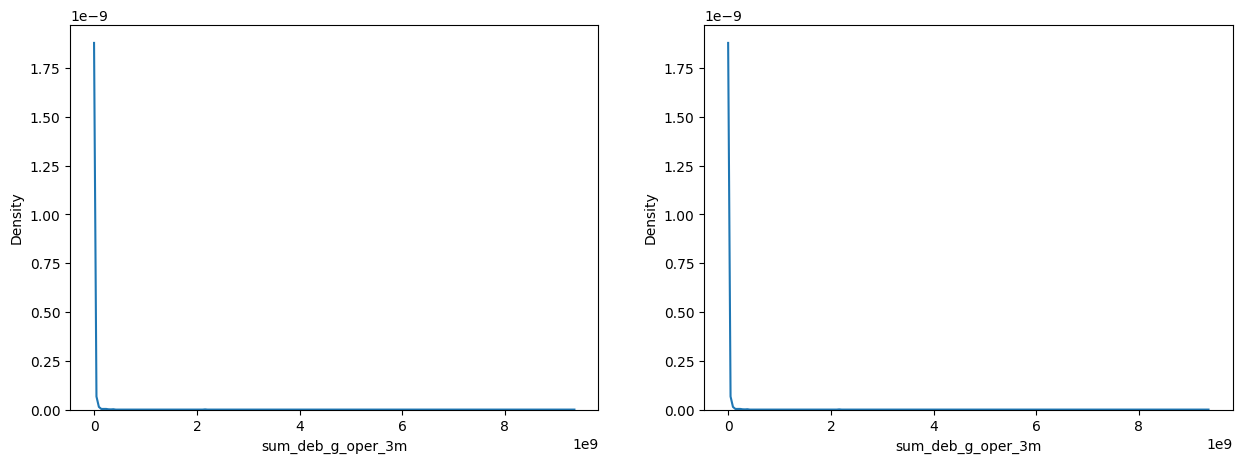

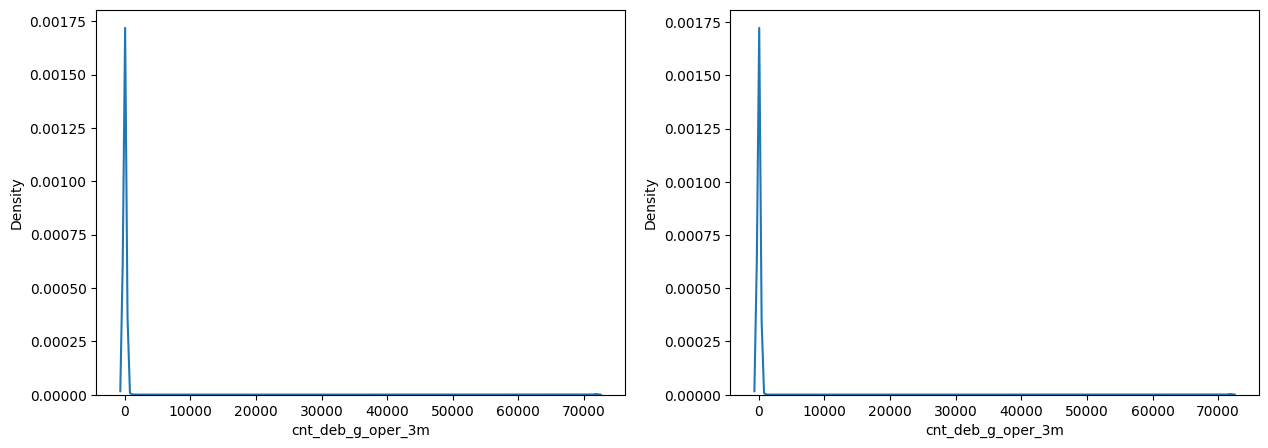

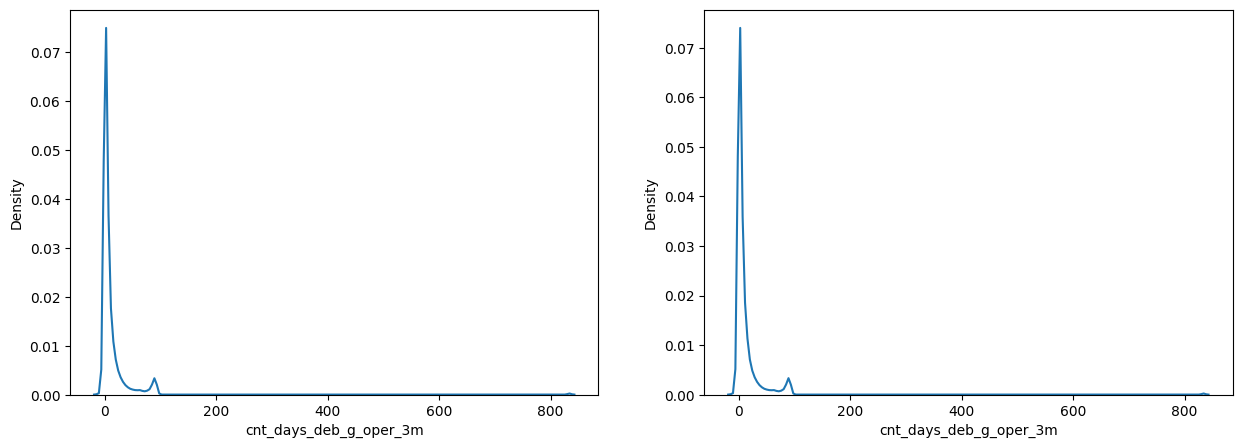

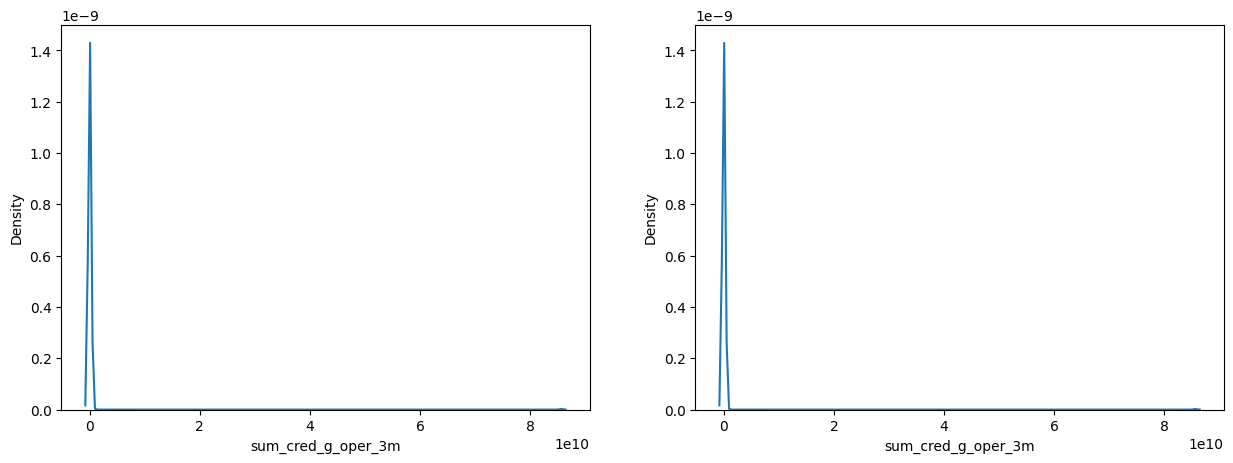

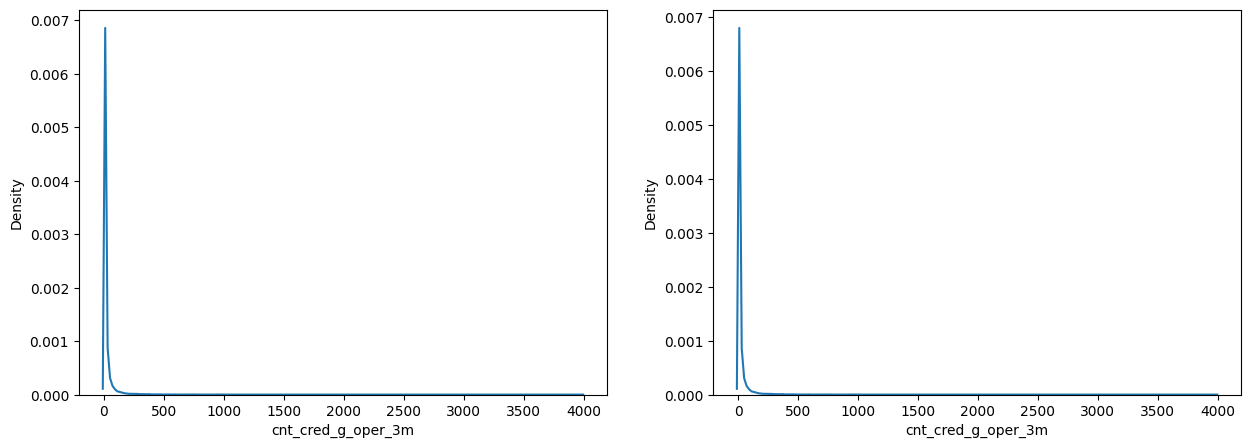

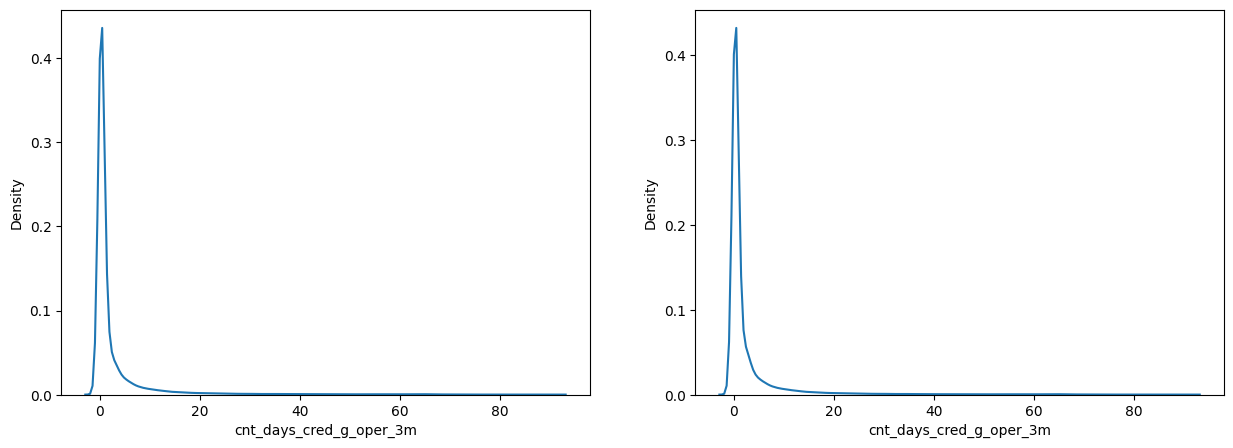

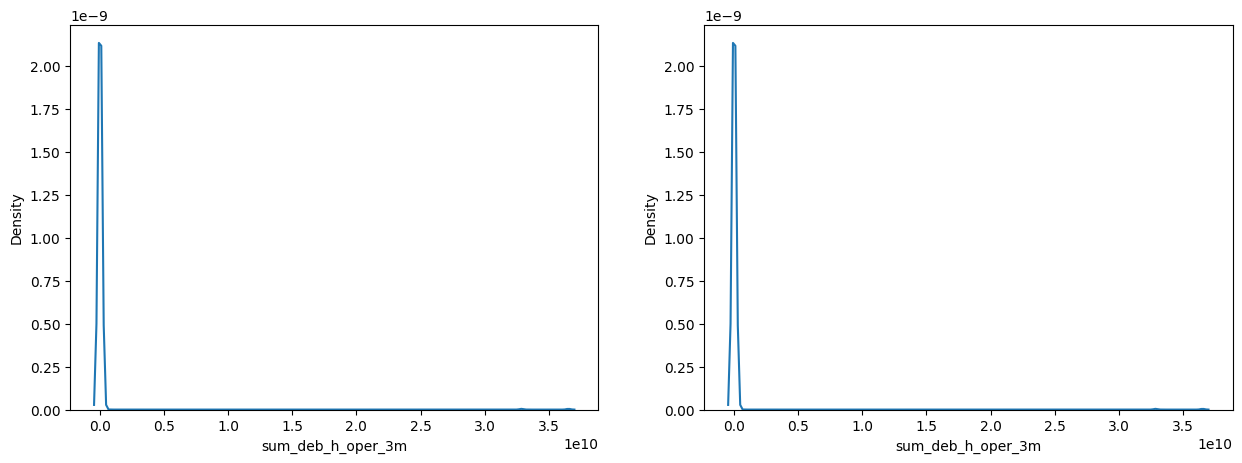

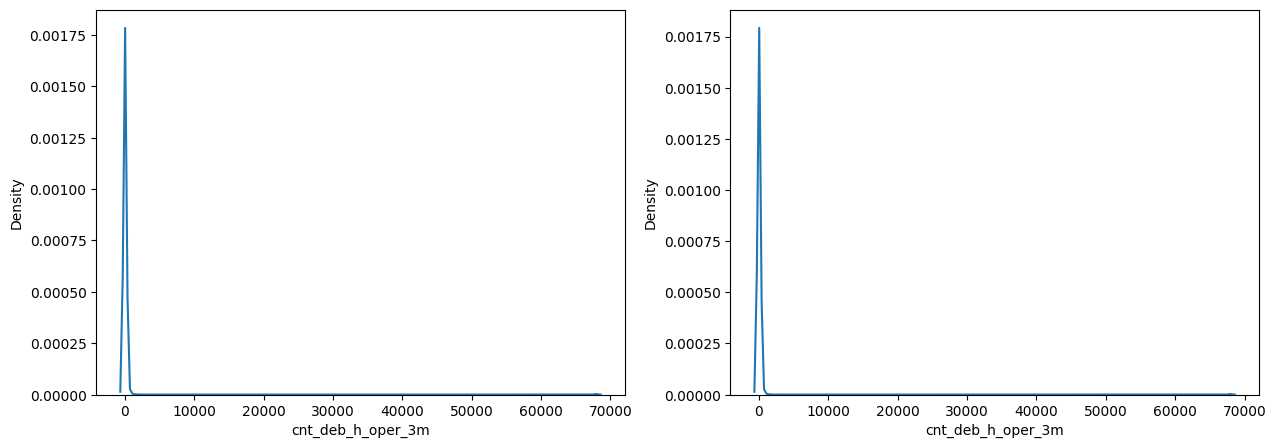

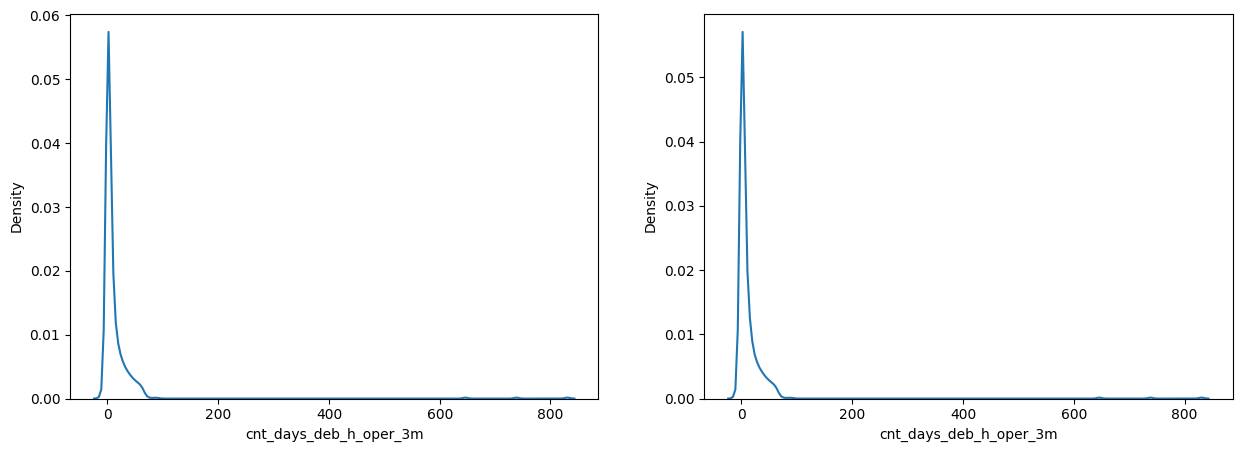

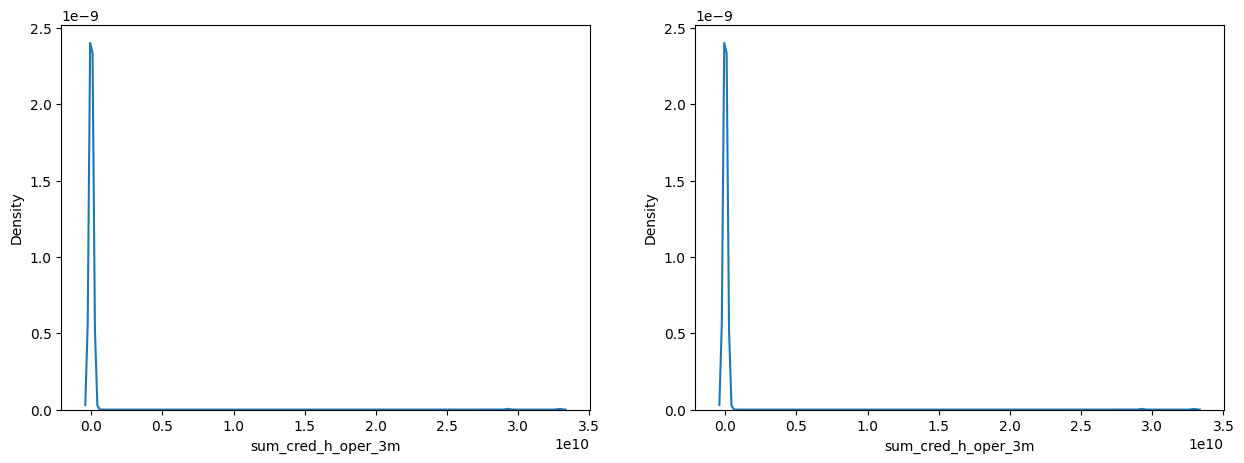

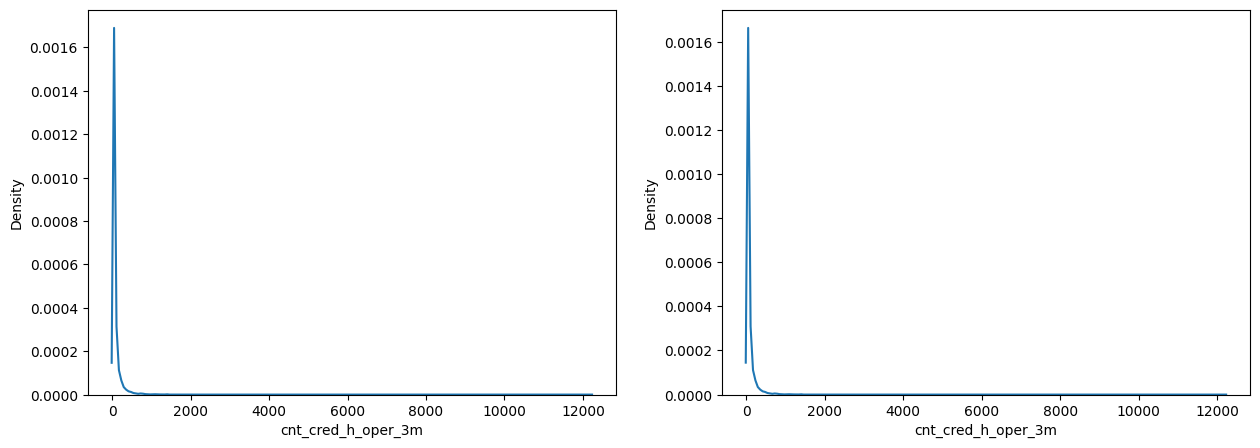

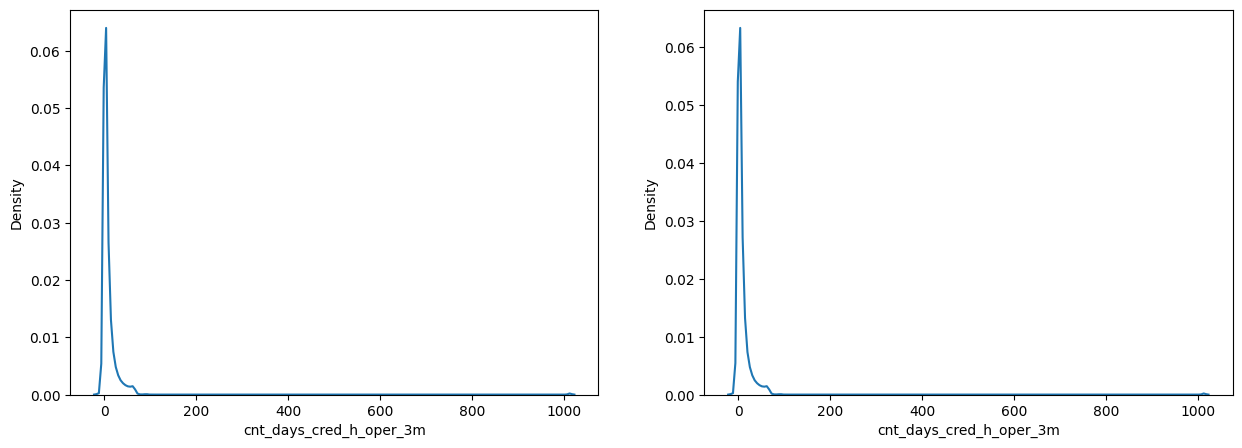

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = df.columns.drop(['id', 'target_1', 'target_2', 'total_target'])

for column in columns:
  fig, axs = plt.subplots(1, 2, figsize=(15, 5))
  if column in category_columns:
    sns.countplot(data=df,x=column, ax=axs[0])
    sns.countplot(data=df_filled,x=column, ax=axs[1])
  else:
    sns.kdeplot(df[column], ax=axs[0])
    sns.kdeplot(df_filled[column], ax=axs[1])
  plt.show()
  plt.close()
  #data with NaN                                                                               #data without NaN

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df_filled.iloc[:, :100]
y = df_filled.iloc[:, 102]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()

for column in category_columns:
  X[column] = label_encoder.fit_transform(X[column])

model = RandomForestClassifier()

model.fit(X_train, y_train)



In [ ]:
y_score = model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

roc_auc = roc_auc_score(y_test, y_score)
roc_auc

0.9150894650268508

In [ ]:
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.9508888888888889

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)

model.fit(X_train, y_train)

In [ ]:
y_score = model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

roc_auc = roc_auc_score(y_test, y_score)
roc_auc

0.7469767908933505

In [ ]:
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.9285138888888889

In [ ]:
data  = {'Model': ['Gradient Boosting', 'Random Forest', 'Logistic Regression'],
         'ROC-AUC': [0.89905, 0.91508, 0.74697],
         'Accuracy': [0.940375, 0.95088, 0.92851]}

table = pd.DataFrame(data)
table

,Model,ROC-AUC,Accuracy
0,Gradient Boosting,0.89905,0.940375
1,Random Forest,0.91508,0.950880
2,Logistic Regression,0.74697,0.928510
